# Model for 3 Component Acceleration Time History 

#### Import required libraries to preprocess the data 

In [220]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

#### Read the data from directories

In [221]:
HNN_input_dir = "E:\\second review\\Featured data\\HNN_FeatureData.csv"

HNE_input_dir = "E:\\second review\\Featured data\\HNE_FeatureData.csv"

HNZ_input_dir = "E:\\second review\\Featured data\\HNZ_FeatureData.csv"

HNZ_ACC       = "E:\\Final Review\\ACC\\HNZ1\\"

HNN_ACC       = "E:\\Final Review\\ACC\\HNN\\"

HNE_ACC       = "E:\\Final Review\\ACC\\HNE\\"

#### After each directory has each of horizontal, vertical, and traverse components of acceleration time history data so every directory has same number of files

In [222]:
len(os.listdir(HNN_ACC))

23522

In [223]:
len(os.listdir(HNE_ACC))

23522

In [224]:
len(os.listdir(HNZ_ACC))

23522

#### The input_dir contains inputs that need to be predicted so first we will preprocess the inputs data frame and save the indexes

In [225]:
HNN1_inputs = pd.read_csv(HNN_input_dir)
HNE1_inputs = pd.read_csv(HNE_input_dir)
HNZ1_inputs = pd.read_csv(HNZ_input_dir)

In [226]:
HNN1_inputs['indexes'] = HNN1_inputs['Unnamed: 0']

HNN1_inputs            = HNN1_inputs.drop('Unnamed: 0',axis=1)

HNN1_inputs            = HNN1_inputs.drop('VS30',axis=1)

HNN1_inputs            = HNN1_inputs[HNN1_inputs['NDATA'] <= 60000]

#HNN1_inputs['NDATA'].values.max()

In [227]:
HNZ1_inputs['indexes'] = HNZ1_inputs['Unnamed: 0']

HNZ1_inputs            = HNZ1_inputs.drop('Unnamed: 0',axis=1)

HNZ1_inputs            = HNZ1_inputs.drop('VS30',axis=1)

HNZ1_inputs            = HNZ1_inputs[HNZ1_inputs['NDATA'] <= 60000]

HNZ1_inputs

,Event_id,Magnitude,Distance,Depth,Lattitude,Longitude,Station Lattitude,Station Longitude,Station_Code,PGA,Site_Class,Time_pga,Low_cut_frequency,High_cut_frequency,Time_Interval,NDATA,Back_Azimuth_Degree,indexes
0,TK-1999-0415,7.2,28.1,14.8,40.8243,31.2073,40.7490,30.8890,487,-223.314606,A,30.590,0.03,40.0,0.005,16000.0,252.8,0
1,TK-1999-0415,7.2,29.7,14.8,40.8243,31.2073,40.7420,30.8730,496,317.371368,A,10.505,0.05,40.0,0.005,5980.0,252.2,1
2,TK-1999-0415,7.2,29.0,14.8,40.8243,31.2073,40.7460,30.8790,498,169.637253,B,18.245,0.20,40.0,0.005,9000.0,252.7,2
3,INT-UT19990920_174715,7.7,153.1,33.0,23.7720,120.9820,25.0860,121.4500,A003,43.229298,C,29.280,0.20,40.0,0.005,28000.0,18.0,3
4,INT-UT19990920_174715,7.7,157.3,33.0,23.7720,120.9820,25.1080,121.5070,A005,23.757397,B,26.360,0.20,40.0,0.005,26800.0,19.7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23517,EMSC-20141113_0000034,4.6,26.6,15.7,38.3972,20.4684,38.1581,20.4904,AC11,-7.895997,B,37.875,0.10,30.0,0.005,29542.0,175.8,23517
23518,EMSC-20141124_0000030,NaN,22.2,13.1,38.3242,20.3482,38.1581,20.4904,AC11,12.216988,B,38.290,0.10,50.0,0.005,27218.0,145.9,23518
23519,EMSC-20141211_0000058,4.6,24.7,27.8,38.3769,20.4401,38.1581,20.4904,AC11,-24.817945,B,40.785,0.10,30.0,0.005,30018.0,169.7,23519
23520,EMSC-20141228_0000016,NaN,160.8,11.3,39.3714,21.5013,38.1581,20.4904,AC11,0.099968,B,52.035,0.35,20.0,0.005,31992.0,213.4,23520


In [228]:
HNE1_inputs['indexes'] = HNE1_inputs['Unnamed: 0']

HNE1_inputs            = HNE1_inputs.drop('Unnamed: 0',axis=1)

HNE1_inputs            = HNE1_inputs.drop('VS30',axis=1)

HNE1_inputs            = HNE1_inputs[HNE1_inputs['NDATA'] <= 60000]

HNE1_inputs

,Event_id,Magnitude,Distance,Depth,Lattitude,Longitude,Station Lattitude,Station Longitude,Station_Code,PGA,Site_Class,Time_pga,Low_cut_frequency,High_cut_frequency,Time_Interval,NDATA,Back_Azimuth_Degree,indexes
0,TK-1999-0415,7.2,28.1,14.8,40.8243,31.2073,40.7490,30.8890,487,276.684662,A,37.025,0.03,40.0,0.005,16000.0,252.8,0
1,TK-1999-0415,7.2,29.7,14.8,40.8243,31.2073,40.7420,30.8730,496,-743.400330,A,10.535,0.05,40.0,0.005,5980.0,252.2,1
2,TK-1999-0415,7.2,29.0,14.8,40.8243,31.2073,40.7460,30.8790,498,-334.310211,B,21.520,0.20,40.0,0.005,9000.0,252.7,2
3,INT-UT19990920_174715,7.7,153.1,33.0,23.7720,120.9820,25.0860,121.4500,A003,-120.757774,C,46.465,0.20,40.0,0.005,28000.0,18.0,3
4,INT-UT19990920_174715,7.7,157.3,33.0,23.7720,120.9820,25.1080,121.5070,A005,-123.115395,B,42.510,0.20,40.0,0.005,26800.0,19.7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23517,EMSC-20141113_0000034,4.6,26.6,15.7,38.3972,20.4684,38.1581,20.4904,AC11,-12.627666,B,37.925,0.10,30.0,0.005,29542.0,175.8,23517
23518,EMSC-20141124_0000030,NaN,22.2,13.1,38.3242,20.3482,38.1581,20.4904,AC11,17.664743,B,38.370,0.10,50.0,0.005,27218.0,145.9,23518
23519,EMSC-20141211_0000058,4.6,24.7,27.8,38.3769,20.4401,38.1581,20.4904,AC11,-27.038462,B,41.070,0.10,30.0,0.005,30018.0,169.7,23519
23520,EMSC-20141228_0000016,NaN,160.8,11.3,39.3714,21.5013,38.1581,20.4904,AC11,0.110642,B,53.350,0.35,20.0,0.005,31992.0,213.4,23520


#### Taking out PGAs to use them in second network function

In [229]:
pga1=HNN1_inputs['PGA'].values

pga2=HNE1_inputs['PGA'].values

pga3=HNZ1_inputs['PGA'].values

In [230]:
HNN_inputs=pd.DataFrame([])

HNN_inputs['Magnitude']  = HNN1_inputs['Magnitude']

HNN_inputs['Distance']   = HNN1_inputs['Distance']

HNN_inputs['Depth']      = HNN1_inputs['Depth']

HNN_inputs['Site_Class'] = HNN1_inputs['Site_Class']

HNN_inputs['PGA']        = HNN1_inputs['PGA']

HNN_inputs               = HNN_inputs.dropna()

HNN_inputs               = HNN_inputs.reset_index()

HNN_inputs

,index,Magnitude,Distance,Depth,Site_Class,PGA
0,0,7.2,28.1,14.8,A,298.205597
1,1,7.2,29.7,14.8,A,-1009.581238
2,2,7.2,29.0,14.8,B,380.992767
3,3,7.7,153.1,33.0,C,-100.459045
4,4,7.7,157.3,33.0,B,-79.068527
...,...,...,...,...,...,...
15190,23514,5.1,7.8,18.0,B,330.209320
15191,23516,4.2,16.1,12.8,B,-10.620499
15192,23517,4.6,26.6,15.7,B,12.616449
15193,23519,4.6,24.7,27.8,B,-27.410091


In [231]:
109998*0.005

549.99

In [232]:
HNE_inputs=pd.DataFrame([])

HNE_inputs['Magnitude']  = HNE1_inputs['Magnitude']

HNE_inputs['Distance']   = HNE1_inputs['Distance']

HNE_inputs['Depth']      = HNE1_inputs['Depth']

HNE_inputs['Site_Class'] = HNE1_inputs['Site_Class']

HNE_inputs['PGA']        = HNE1_inputs['PGA']

HNE_inputs               = HNE_inputs.dropna()

HNE_inputs               = HNE_inputs.reset_index()

HNE_inputs

,index,Magnitude,Distance,Depth,Site_Class,PGA
0,0,7.2,28.1,14.8,A,276.684662
1,1,7.2,29.7,14.8,A,-743.400330
2,2,7.2,29.0,14.8,B,-334.310211
3,3,7.7,153.1,33.0,C,-120.757774
4,4,7.7,157.3,33.0,B,-123.115395
...,...,...,...,...,...,...
15190,23514,5.1,7.8,18.0,B,-204.232559
15191,23516,4.2,16.1,12.8,B,-7.455774
15192,23517,4.6,26.6,15.7,B,-12.627666
15193,23519,4.6,24.7,27.8,B,-27.038462


In [233]:
HNZ_inputs=pd.DataFrame([])

HNZ_inputs['Magnitude']  = HNZ1_inputs['Magnitude']

HNZ_inputs['Distance']   = HNZ1_inputs['Distance']

HNZ_inputs['Depth']      = HNZ1_inputs['Depth']

HNZ_inputs['Site_Class'] = HNZ1_inputs['Site_Class']

HNZ_inputs['PGA']        = HNZ1_inputs['PGA']

HNZ_inputs               = HNZ_inputs.dropna()

HNZ_inputs               = HNZ_inputs.reset_index()

HNZ_inputs

,index,Magnitude,Distance,Depth,Site_Class,PGA
0,0,7.2,28.1,14.8,A,-223.314606
1,1,7.2,29.7,14.8,A,317.371368
2,2,7.2,29.0,14.8,B,169.637253
3,3,7.7,153.1,33.0,C,43.229298
4,4,7.7,157.3,33.0,B,23.757397
...,...,...,...,...,...,...
15190,23514,5.1,7.8,18.0,B,-174.394852
15191,23516,4.2,16.1,12.8,B,-7.336763
15192,23517,4.6,26.6,15.7,B,-7.895997
15193,23519,4.6,24.7,27.8,B,-24.817945


#### change site_class variables into categorical variables

In [234]:
def i(i):
    dic={
            'A':100000,
            'B':60000,
            'C':24000,
            'D':16000,
            'E':10000,
        }
    if i not in dic.keys():
        return None
    
    return dic[i]

In [235]:
def km_cm(i):
    return i*(10**5)

In [236]:
HNN_inputs['Vs30']=HNN_inputs['Site_Class'].apply(i)
HNZ_inputs['Vs30']=HNZ_inputs['Site_Class'].apply(i)
HNE_inputs['Vs30']=HNE_inputs['Site_Class'].apply(i)

In [237]:
HNN_inputs['Distance']=HNN_inputs['Distance'].apply(km_cm)
HNZ_inputs['Distance']=HNZ_inputs['Distance'].apply(km_cm)
HNE_inputs['Distance']=HNE_inputs['Distance'].apply(km_cm)
HNN_inputs['Depth']=HNN_inputs['Depth'].apply(km_cm)
HNZ_inputs['Depth']=HNZ_inputs['Depth'].apply(km_cm)
HNE_inputs['Depth']=HNE_inputs['Depth'].apply(km_cm)

In [238]:
HNN_inputs=HNN_inputs.drop('Site_Class',axis=1)
HNE_inputs=HNE_inputs.drop('Site_Class',axis=1)
HNZ_inputs=HNZ_inputs.drop('Site_Class',axis=1)

In [239]:
HNZ_inputs

,index,Magnitude,Distance,Depth,PGA,Vs30
0,0,7.2,2810000.0,1480000.0,-223.314606,100000
1,1,7.2,2970000.0,1480000.0,317.371368,100000
2,2,7.2,2900000.0,1480000.0,169.637253,60000
3,3,7.7,15310000.0,3300000.0,43.229298,24000
4,4,7.7,15730000.0,3300000.0,23.757397,60000
...,...,...,...,...,...,...
15190,23514,5.1,780000.0,1800000.0,-174.394852,60000
15191,23516,4.2,1610000.0,1280000.0,-7.336763,60000
15192,23517,4.6,2660000.0,1570000.0,-7.895997,60000
15193,23519,4.6,2470000.0,2780000.0,-24.817945,60000


<AxesSubplot:xlabel='Magnitude', ylabel='PGA'>

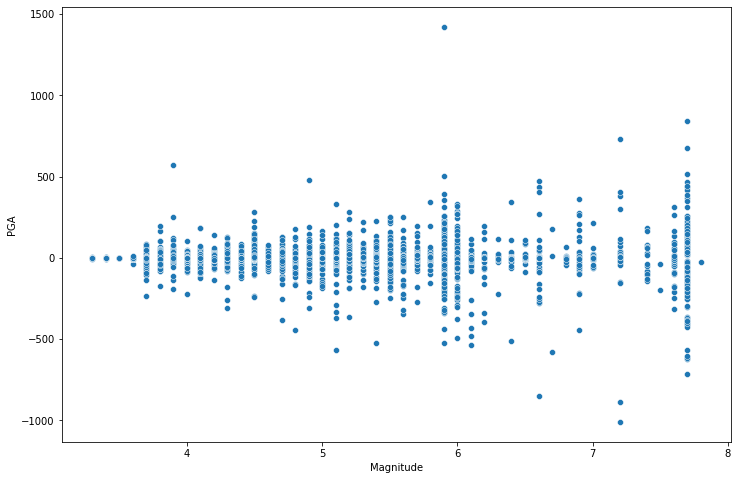

In [240]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Magnitude',y='PGA',data=HNN_inputs)

<AxesSubplot:xlabel='Distance', ylabel='PGA'>

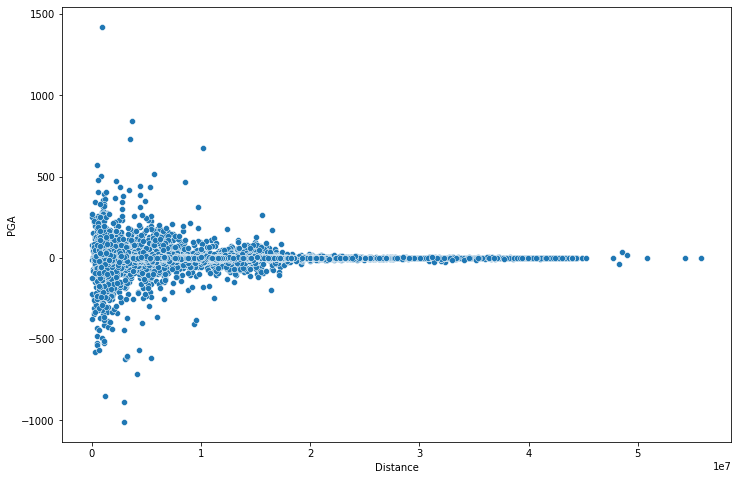

In [241]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Distance',y='PGA',data=HNN_inputs)

<AxesSubplot:xlabel='Vs30', ylabel='PGA'>

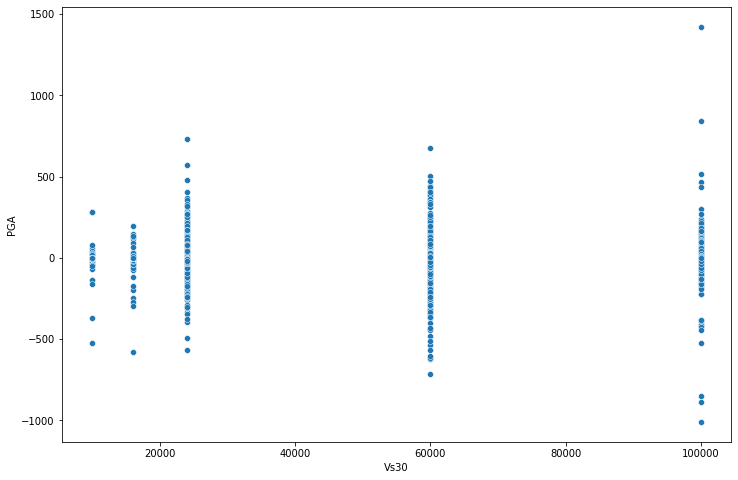

In [242]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Vs30',y='PGA',data=HNN_inputs)

<AxesSubplot:xlabel='Depth', ylabel='PGA'>

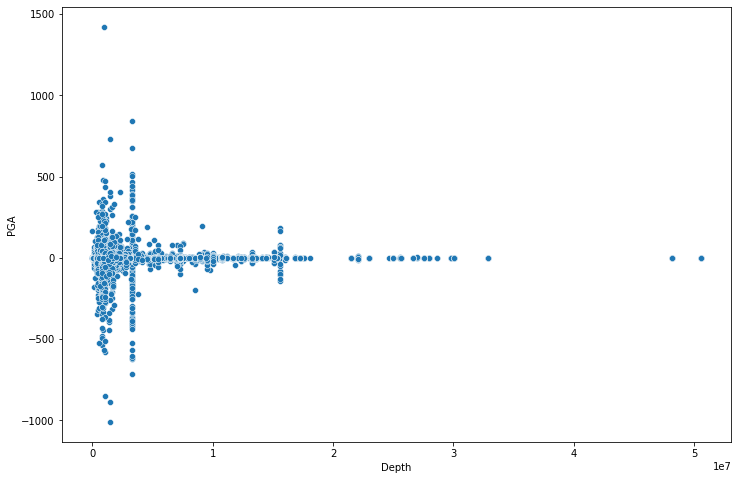

In [243]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Depth',y='PGA',data=HNN_inputs)

In [244]:
HNN_inputs.corr()

,index,Magnitude,Distance,Depth,PGA,Vs30
index,1.000000,-0.219624,0.007823,0.065002,0.027761,-0.109623
Magnitude,-0.219624,1.000000,0.282101,0.100291,-0.019173,-0.042692
Distance,0.007823,0.282101,1.000000,0.101318,0.015676,0.102658
Depth,0.065002,0.100291,0.101318,1.000000,0.003971,0.039234
PGA,0.027761,-0.019173,0.015676,0.003971,1.000000,0.009040
Vs30,-0.109623,-0.042692,0.102658,0.039234,0.009040,1.000000


#### As we can see the correlation between variables is very low we have to perform some mathematical operations to increase the correlation between them to get a good model

In [245]:
from math import log10

In [246]:
def log(i):
    
    if i<0:
    
        return log10(-i)
    
    else:
        
        return log10(i)
    
def delog(i):
    
    return 10**i

In [247]:
HNN_inputs['log(PGA)']=HNN_inputs['PGA'].apply(log)
HNE_inputs['log(PGA)']=HNE_inputs['PGA'].apply(log)
HNZ_inputs['log(PGA)']=HNZ_inputs['PGA'].apply(log)

<AxesSubplot:ylabel='Count'>

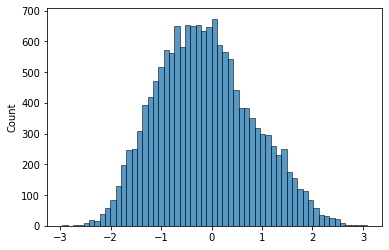

In [248]:
sns.histplot(HNZ_inputs['log(PGA)'].values)

In [249]:
HNN_inputs=HNN_inputs[HNN_inputs['Magnitude']< 6.9  ]
HNN_inputs=HNN_inputs[HNN_inputs['Distance'] < km_cm(300)  ]
HNN_inputs=HNN_inputs[HNN_inputs['Depth'] < km_cm(20)  ]
HNN_inputs

,index,Magnitude,Distance,Depth,PGA,Vs30,log(PGA)
514,534,6.7,3540000.0,460000.0,178.167389,24000,2.250828
515,536,6.7,340000.0,1000000.0,-579.179199,16000,2.762813
530,563,5.6,1050000.0,360000.0,-347.722565,24000,2.541233
538,576,5.6,2870000.0,360000.0,22.688801,60000,1.355812
540,581,5.6,1790000.0,360000.0,44.506516,24000,1.648424
...,...,...,...,...,...,...,...
15189,23513,5.1,14630000.0,890000.0,1.202371,60000,0.080038
15190,23514,5.1,780000.0,1800000.0,330.209320,60000,2.518789
15191,23516,4.2,1610000.0,1280000.0,-10.620499,60000,1.026145
15192,23517,4.6,2660000.0,1570000.0,12.616449,60000,1.100937


In [250]:
HNE_inputs=HNE_inputs[HNE_inputs['Magnitude']< 6.9  ]
HNE_inputs=HNE_inputs[HNE_inputs['Distance'] < km_cm(300) ]
HNE_inputs=HNE_inputs[HNE_inputs['Depth'] < km_cm(20)  ]
HNE_inputs

,index,Magnitude,Distance,Depth,PGA,Vs30,log(PGA)
514,534,6.7,3540000.0,460000.0,178.752899,24000,2.252253
515,536,6.7,340000.0,1000000.0,-708.032349,16000,2.850053
530,563,5.6,1050000.0,360000.0,-494.290771,24000,2.693983
538,576,5.6,2870000.0,360000.0,25.015657,60000,1.398212
540,581,5.6,1790000.0,360000.0,50.771336,24000,1.705619
...,...,...,...,...,...,...,...
15189,23513,5.1,14630000.0,890000.0,-0.928656,60000,-0.032145
15190,23514,5.1,780000.0,1800000.0,-204.232559,60000,2.310125
15191,23516,4.2,1610000.0,1280000.0,-7.455774,60000,0.872493
15192,23517,4.6,2660000.0,1570000.0,-12.627666,60000,1.101323


In [251]:
HNZ_inputs=HNZ_inputs[HNZ_inputs['Magnitude'] < 6.9  ]
HNZ_inputs=HNZ_inputs[HNZ_inputs['Distance']  < km_cm(300)  ]
HNE_inputs=HNE_inputs[HNE_inputs['Depth'] < km_cm(20)  ]
HNZ_inputs

,index,Magnitude,Distance,Depth,PGA,Vs30,log(PGA)
57,58,5.9,3140000.0,3300000.0,-25.582375,100000,1.407941
85,88,5.9,8180000.0,3300000.0,-16.779089,60000,1.224768
88,91,5.9,8260000.0,3300000.0,9.668226,24000,0.985347
90,93,5.9,8060000.0,3300000.0,14.442859,24000,1.159653
92,95,5.9,8670000.0,3300000.0,-10.063539,100000,1.002751
...,...,...,...,...,...,...,...
15190,23514,5.1,780000.0,1800000.0,-174.394852,60000,2.241534
15191,23516,4.2,1610000.0,1280000.0,-7.336763,60000,0.865504
15192,23517,4.6,2660000.0,1570000.0,-7.895997,60000,0.897407
15193,23519,4.6,2470000.0,2780000.0,-24.817945,60000,1.394766


In [252]:
HNN_inputs['log(Depth)']=HNN_inputs['Depth'].apply(log)
HNE_inputs['log(Depth)']=HNE_inputs['Depth'].apply(log)
HNZ_inputs['log(Depth)']=HNZ_inputs['Depth'].apply(log)

In [253]:
HNN_inputs

,index,Magnitude,Distance,Depth,PGA,Vs30,log(PGA),log(Depth)
514,534,6.7,3540000.0,460000.0,178.167389,24000,2.250828,5.662758
515,536,6.7,340000.0,1000000.0,-579.179199,16000,2.762813,6.000000
530,563,5.6,1050000.0,360000.0,-347.722565,24000,2.541233,5.556303
538,576,5.6,2870000.0,360000.0,22.688801,60000,1.355812,5.556303
540,581,5.6,1790000.0,360000.0,44.506516,24000,1.648424,5.556303
...,...,...,...,...,...,...,...,...
15189,23513,5.1,14630000.0,890000.0,1.202371,60000,0.080038,5.949390
15190,23514,5.1,780000.0,1800000.0,330.209320,60000,2.518789,6.255273
15191,23516,4.2,1610000.0,1280000.0,-10.620499,60000,1.026145,6.107210
15192,23517,4.6,2660000.0,1570000.0,12.616449,60000,1.100937,6.195900


In [254]:
HNN_inputs['log(Depth)']=HNN_inputs['Depth'].apply(log)
HNE_inputs['log(Depth)']=HNE_inputs['Depth'].apply(log)
HNZ_inputs['log(Depth)']=HNZ_inputs['Depth'].apply(log)

In [255]:
HNN_inputs['log(Distance)']=HNN_inputs['Distance'].apply(log)
HNE_inputs['log(Distance)']=HNE_inputs['Distance'].apply(log)
HNZ_inputs['log(Distance)']=HNZ_inputs['Distance'].apply(log)

In [256]:
HNN_inputs['log(Magnitude)']=HNN_inputs['Magnitude'].apply(log)
HNE_inputs['log(Magnitude)']=HNE_inputs['Magnitude'].apply(log)
HNZ_inputs['log(Magnitude)']=HNZ_inputs['Magnitude'].apply(log)

In [257]:
HNN_inputs['log(Vs30)']=HNN_inputs['Vs30'].apply(log)
HNE_inputs['log(Vs30)']=HNE_inputs['Vs30'].apply(log)
HNZ_inputs['log(Vs30)']=HNZ_inputs['Vs30'].apply(log)

In [258]:
HNN_inputs.corr()

,index,Magnitude,Distance,Depth,PGA,Vs30,log(PGA),log(Depth),log(Distance),log(Magnitude),log(Vs30)
index,1.000000,-0.069021,-0.069428,-0.099850,0.019405,-0.108459,0.182347,-0.061707,-0.084007,-0.075840,-0.103122
Magnitude,-0.069021,1.000000,0.263412,0.040480,-0.037033,-0.057114,0.291649,0.039701,0.206458,0.996697,-0.047645
Distance,-0.069428,0.263412,1.000000,0.128735,0.025876,0.135362,-0.675214,0.084147,0.895839,0.268124,0.141899
Depth,-0.099850,0.040480,0.128735,1.000000,0.005956,0.140625,-0.106655,0.909116,0.145579,0.051560,0.159837
PGA,0.019405,-0.037033,0.025876,0.005956,1.000000,0.017577,-0.048809,0.001987,0.046850,-0.034948,0.017531
Vs30,-0.108459,-0.057114,0.135362,0.140625,0.017577,1.000000,-0.252834,0.113493,0.145310,-0.049838,0.961899
log(PGA),0.182347,0.291649,-0.675214,-0.106655,-0.048809,-0.252834,1.000000,-0.064076,-0.748014,0.282332,-0.247811
log(Depth),-0.061707,0.039701,0.084147,0.909116,0.001987,0.113493,-0.064076,1.000000,0.095883,0.044637,0.134239
log(Distance),-0.084007,0.206458,0.895839,0.145579,0.046850,0.145310,-0.748014,0.095883,1.000000,0.212480,0.148743
log(Magnitude),-0.075840,0.996697,0.268124,0.051560,-0.034948,-0.049838,0.282332,0.044637,0.212480,1.000000,-0.039550


#### from this correlation matrix we have seen that the variables log(Distance) has more correlation to log(PGA) than to PGA so we consider them for our model

In [259]:
# take out indexes to use them in second network function
index1=HNN_inputs['index'].values
index2=HNE_inputs['index'].values
index3=HNZ_inputs['index'].values

In [260]:
HNN=pd.DataFrame([])
HNN['log(Distance)']=HNN_inputs['log(Distance)']
HNN['Magnitude'] = HNN_inputs['Magnitude']
HNN['Depth'] = HNN_inputs['Depth']
HNN['Magnitude'] = HNN_inputs['Magnitude']
HNN['log(Vs30)']=HNN_inputs['log(Vs30)']
HNN

,log(Distance),Magnitude,Depth,log(Vs30)
514,6.549003,6.7,460000.0,4.380211
515,5.531479,6.7,1000000.0,4.204120
530,6.021189,5.6,360000.0,4.380211
538,6.457882,5.6,360000.0,4.778151
540,6.252853,5.6,360000.0,4.380211
...,...,...,...,...
15189,7.165244,5.1,890000.0,4.778151
15190,5.892095,5.1,1800000.0,4.778151
15191,6.206826,4.2,1280000.0,4.778151
15192,6.424882,4.6,1570000.0,4.778151


In [261]:
HNE=pd.DataFrame([])
HNE['log(Distance)']=HNE_inputs['log(Distance)']
HNE['Magnitude'] = HNE_inputs['Magnitude']
HNE['Depth'] = HNE_inputs['Depth']
HNE['Magnitude'] = HNE_inputs['Magnitude']
HNE['log(Vs30)']=HNE_inputs['log(Vs30)']
HNE

,log(Distance),Magnitude,Depth,log(Vs30)
514,6.549003,6.7,460000.0,4.380211
515,5.531479,6.7,1000000.0,4.204120
530,6.021189,5.6,360000.0,4.380211
538,6.457882,5.6,360000.0,4.778151
540,6.252853,5.6,360000.0,4.380211
...,...,...,...,...
15189,7.165244,5.1,890000.0,4.778151
15190,5.892095,5.1,1800000.0,4.778151
15191,6.206826,4.2,1280000.0,4.778151
15192,6.424882,4.6,1570000.0,4.778151


In [262]:
HNZ=pd.DataFrame([])
HNZ['log(Distance)'] = HNZ_inputs['log(Distance)']
HNZ['Magnitude']     = HNZ_inputs['Magnitude']
HNZ['Depth']         = HNZ_inputs['Depth']
HNZ['Magnitude']    = HNZ_inputs['Magnitude']
HNZ['log(Vs30)']     = HNZ_inputs['log(Vs30)']
HNZ

,log(Distance),Magnitude,Depth,log(Vs30)
57,6.496930,5.9,3300000.0,5.000000
85,6.912753,5.9,3300000.0,4.778151
88,6.916980,5.9,3300000.0,4.380211
90,6.906335,5.9,3300000.0,4.380211
92,6.938019,5.9,3300000.0,5.000000
...,...,...,...,...
15190,5.892095,5.1,1800000.0,4.778151
15191,6.206826,4.2,1280000.0,4.778151
15192,6.424882,4.6,1570000.0,4.778151
15193,6.392697,4.6,2780000.0,4.778151


#### Data Preproccessing Complete now take and scale the arrays to train our network

In [263]:
x1=HNN.values
x2=HNE.values
x3=HNZ.values

In [264]:
HNN.values

array([[6.54900326e+00, 6.70000000e+00, 4.60000000e+05, 4.38021124e+00],
       [5.53147892e+00, 6.70000000e+00, 1.00000000e+06, 4.20411998e+00],
       [6.02118930e+00, 5.60000000e+00, 3.60000000e+05, 4.38021124e+00],
       ...,
       [6.20682588e+00, 4.20000000e+00, 1.28000000e+06, 4.77815125e+00],
       [6.42488164e+00, 4.60000000e+00, 1.57000000e+06, 4.77815125e+00],
       [6.82020146e+00, 4.50000000e+00, 1.92000000e+06, 4.77815125e+00]])

In [265]:
HNE.values

array([[6.54900326e+00, 6.70000000e+00, 4.60000000e+05, 4.38021124e+00],
       [5.53147892e+00, 6.70000000e+00, 1.00000000e+06, 4.20411998e+00],
       [6.02118930e+00, 5.60000000e+00, 3.60000000e+05, 4.38021124e+00],
       ...,
       [6.20682588e+00, 4.20000000e+00, 1.28000000e+06, 4.77815125e+00],
       [6.42488164e+00, 4.60000000e+00, 1.57000000e+06, 4.77815125e+00],
       [6.82020146e+00, 4.50000000e+00, 1.92000000e+06, 4.77815125e+00]])

In [266]:
HNZ.values

array([[6.49692965e+00, 5.90000000e+00, 3.30000000e+06, 5.00000000e+00],
       [6.91275330e+00, 5.90000000e+00, 3.30000000e+06, 4.77815125e+00],
       [6.91698005e+00, 5.90000000e+00, 3.30000000e+06, 4.38021124e+00],
       ...,
       [6.42488164e+00, 4.60000000e+00, 1.57000000e+06, 4.77815125e+00],
       [6.39269695e+00, 4.60000000e+00, 2.78000000e+06, 4.77815125e+00],
       [6.82020146e+00, 4.50000000e+00, 1.92000000e+06, 4.77815125e+00]])

In [267]:
y1=HNN_inputs['log(PGA)'].values
y2=HNE_inputs['log(PGA)'].values
y3=HNZ_inputs['log(PGA)'].values

In [268]:
y1

array([2.25082822, 2.76281296, 2.54123287, ..., 1.02614492, 1.10093714,
       0.56755649])

In [269]:
y2

array([2.25225309, 2.8500531 , 2.6939825 , ..., 0.87249274, 1.10132309,
       0.37830903])

In [270]:
y3

array([1.40794086, 1.22476838, 0.98534679, ..., 0.89740697, 1.39476582,
       0.40226482])

#### Normalize the input variables using standard scaler

In [271]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [272]:
S = StandardScaler()

In [273]:
x2

array([[6.54900326e+00, 6.70000000e+00, 4.60000000e+05, 4.38021124e+00],
       [5.53147892e+00, 6.70000000e+00, 1.00000000e+06, 4.20411998e+00],
       [6.02118930e+00, 5.60000000e+00, 3.60000000e+05, 4.38021124e+00],
       ...,
       [6.20682588e+00, 4.20000000e+00, 1.28000000e+06, 4.77815125e+00],
       [6.42488164e+00, 4.60000000e+00, 1.57000000e+06, 4.77815125e+00],
       [6.82020146e+00, 4.50000000e+00, 1.92000000e+06, 4.77815125e+00]])

In [274]:
x11=S.fit_transform(x1)
x22=S.fit_transform(x2)
x33=S.fit_transform(x3)

In [275]:
x11

array([[-0.70969922,  3.12921174, -1.37449383, -1.54189912],
       [-3.07603724,  3.12921174, -0.0093528 , -2.28814613],
       [-1.93717477,  1.48452957, -1.62729773, -1.54189912],
       ...,
       [-1.50546137, -0.60870228,  0.69849811,  0.14450795],
       [-0.99835445, -0.01063604,  1.4316294 ,  0.14450795],
       [-0.07900512, -0.1601526 ,  2.31644303,  0.14450795]])

In [276]:
k=y_test[0][0]-np.mean(y_test[0][0])

(0.0, 1000.0)

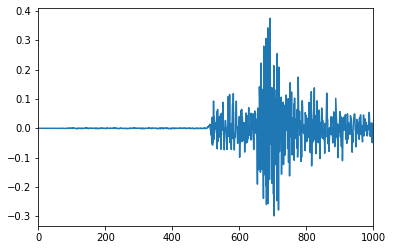

In [277]:
plt.plot(k)
plt.xlim(0,1000)

(0.0, 1000.0)

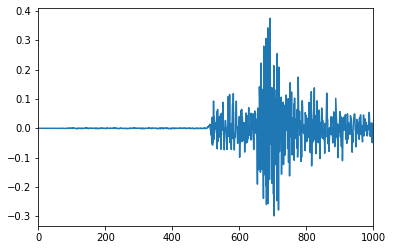

In [278]:
plt.plot(y_test[0][0])
plt.xlim(0,1000)

In [279]:
x22

array([[-0.70969922,  3.12921174, -1.37449383, -1.54189912],
       [-3.07603724,  3.12921174, -0.0093528 , -2.28814613],
       [-1.93717477,  1.48452957, -1.62729773, -1.54189912],
       ...,
       [-1.50546137, -0.60870228,  0.69849811,  0.14450795],
       [-0.99835445, -0.01063604,  1.4316294 ,  0.14450795],
       [-0.07900512, -0.1601526 ,  2.31644303,  0.14450795]])

In [280]:
x33

array([[-0.944373  ,  1.89412336,  0.31124268,  1.08114596],
       [ 0.05871756,  1.89412336,  0.31124268,  0.13212613],
       [ 0.06891372,  1.89412336,  0.31124268, -1.57017312],
       ...,
       [-1.11817427, -0.0763584 , -0.16311259,  0.13212613],
       [-1.19581332, -0.0763584 ,  0.16866191,  0.13212613],
       [-0.16454507, -0.22793392, -0.06714476,  0.13212613]])

In [281]:
mean=np.mean(y3)

#### Divide for testing and training 

In [282]:
from sklearn.model_selection import train_test_split

In [283]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x22,y2,test_size=0.3,random_state=101)

In [284]:
D=HNE_inputs['log(Distance)'].values
D1_train,D1_test=train_test_split(D,test_size=0.3,random_state=101)

In [285]:
x1_train

array([[-0.1767964 ,  0.73694677,  2.34172342,  0.14450795],
       [-0.61447508, -0.1601526 , -0.2621567 ,  0.14450795],
       [ 1.00426494,  2.53114549, -0.23687631,  1.084668  ],
       ...,
       [-0.70117606, -1.35628508, -1.04584877, -1.54189912],
       [-0.17175904, -1.05725196,  0.72377849, -1.54189912],
       [ 0.97939103, -0.9077354 ,  1.2041059 ,  0.14450795]])

### Build a neural network

In [286]:
import tensorflow as tf
from keras.layers import Input, Dense, LeakyReLU, Dropout
from keras.models import Model
from keras.optimizers import Adam,RMSprop
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.metrics import r2_score

In [287]:
model1=Sequential()
model1.add(Dense(4,activation='relu',input_dim=4))
model1.add(Dense(6,activation='relu'))
#model1.add(Dropout(0.5))
#model1.add(Dense(5,activation='relu'))
#model1.add(Dropout(0.5))
#model1.add(Dense(2,activation='relu'))
model1.add(Dense(1))

In [288]:
model1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 4)                 20        
                                                                 
 dense_42 (Dense)            (None, 6)                 30        
                                                                 
 dense_43 (Dense)            (None, 1)                 7         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [289]:
inputs = Input(shape=(100,))
hidden_layer = Dense(50, activation='relu')(inputs)
outputs = Dense(10, activation='softmax')(hidden_layer)

In [290]:
outputs

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_45')>

In [291]:
kl_divergence_loss = KLDivergence()(true_distribution, predicted_distribution)

NameError: name 'true_distribution' is not defined

In [ ]:
model1.compile(optimizer=Adam(0.001), loss='mse',metrics=['mae'])

In [248]:
model1.fit(x=x1_train,y=y1_train,validation_data=(x1_test,y1_test),batch_size=128,epochs=200)

Epoch 1/200
61/61 [==============================] - 1s 5ms/step - loss: 0.7406 - mae: 0.7039 - val_loss: 0.6326 - val_mae: 0.6488
Epoch 2/200
61/61 [==============================] - 0s 4ms/step - loss: 0.5410 - mae: 0.5960 - val_loss: 0.4838 - val_mae: 0.5560
Epoch 3/200
61/61 [==============================] - 0s 4ms/step - loss: 0.4152 - mae: 0.5120 - val_loss: 0.3798 - val_mae: 0.4844
Epoch 4/200
61/61 [==============================] - 0s 4ms/step - loss: 0.3384 - mae: 0.4572 - val_loss: 0.3220 - val_mae: 0.4456
Epoch 5/200
61/61 [==============================] - 0s 3ms/step - loss: 0.2958 - mae: 0.4266 - val_loss: 0.2880 - val_mae: 0.4212
Epoch 6/200
61/61 [==============================] - 0s 3ms/step - loss: 0.2677 - mae: 0.4059 - val_loss: 0.2625 - val_mae: 0.4028
Epoch 7/200
61/61 [==============================] - 0s 3ms/step - loss: 0.2452 - mae: 0.3891 - val_loss: 0.2413 - val_mae: 0.3871
Epoch 8/200
61/61 [==============================] - 0s 3ms/step - loss: 0.2274 - m

Epoch 125/200
61/61 [==============================] - 0s 3ms/step - loss: 0.1810 - mae: 0.3370 - val_loss: 0.1783 - val_mae: 0.3343
Epoch 126/200
61/61 [==============================] - 0s 3ms/step - loss: 0.1807 - mae: 0.3370 - val_loss: 0.1779 - val_mae: 0.3336
Epoch 127/200
61/61 [==============================] - 0s 3ms/step - loss: 0.1810 - mae: 0.3364 - val_loss: 0.1786 - val_mae: 0.3356
Epoch 128/200
61/61 [==============================] - 0s 3ms/step - loss: 0.1808 - mae: 0.3367 - val_loss: 0.1785 - val_mae: 0.3347
Epoch 129/200
61/61 [==============================] - 0s 3ms/step - loss: 0.1809 - mae: 0.3369 - val_loss: 0.1786 - val_mae: 0.3354
Epoch 130/200
61/61 [==============================] - 0s 3ms/step - loss: 0.1808 - mae: 0.3366 - val_loss: 0.1785 - val_mae: 0.3351
Epoch 131/200
61/61 [==============================] - 0s 3ms/step - loss: 0.1808 - mae: 0.3368 - val_loss: 0.1780 - val_mae: 0.3337
Epoch 132/200
61/61 [==============================] - 0s 3ms/step - 

In [346]:
model1.save('HNE_model.h5')

In [400]:
losses=pd.DataFrame(model1.history.history)

In [407]:
losses.keys()

Index(['loss', 'mae', 'val_loss', 'val_mae'], dtype='object')

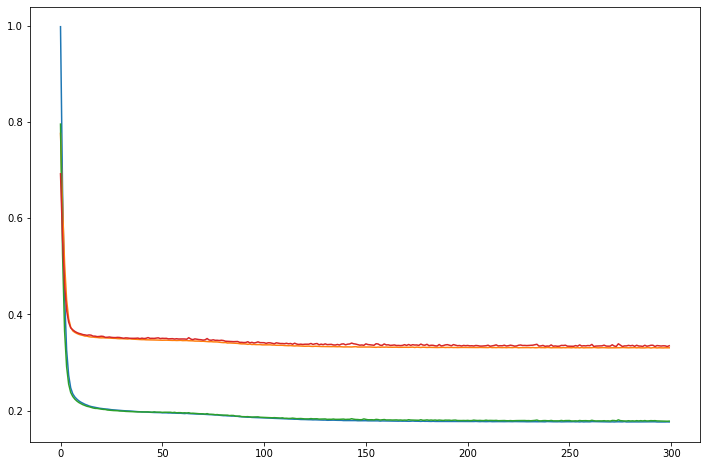

In [402]:
plt.figure(figsize=(12,8))
plt.plot(losses)

In [364]:
losses=pd.DataFrame(model1.history.history)

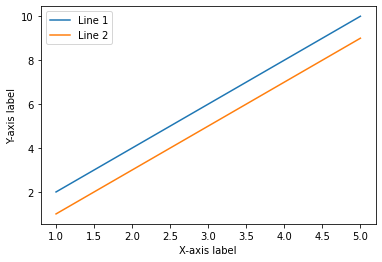

In [365]:
import matplotlib.pyplot as plt

# Create some sample data
x = [1, 2, 3, 4, 5]
y1 = [2, 4, 6, 8, 10]
y2 = [1, 3, 5, 7, 9]

# Create the plot
plt.plot(x, y1, label='Line 1')
plt.plot(x, y2, label='Line 2')

# Add labels
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

# Add legend
plt.legend()

# Show the plot
plt.show()


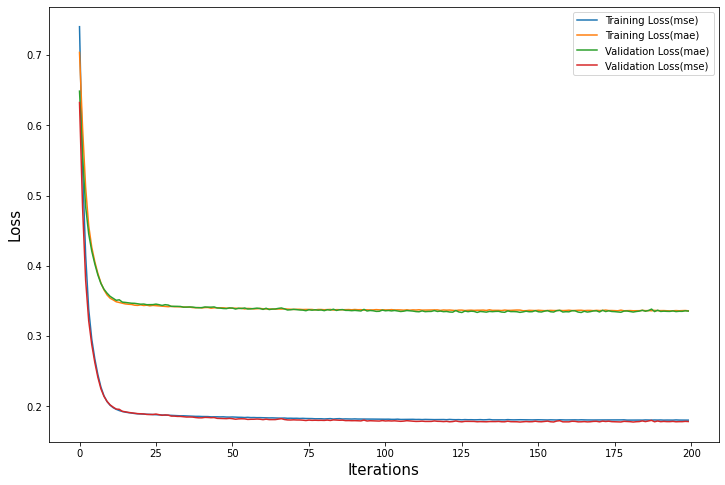

In [366]:
plt.figure(figsize=(12,8))
plt.plot(losses['loss'],label= 'Training Loss(mse)')
plt.plot(losses['mae'],label= 'Training Loss(mae)')
plt.plot(losses['val_mae'],label= 'Validation Loss(mae)')
plt.plot(losses['val_loss'],label= 'Validation Loss(mse)')
plt.xlabel('Iterations',size=15)
plt.ylabel('Loss',size=15)
plt.legend()
plt.show()

In [425]:
model1.save('HNE_PGA.h5')

In [222]:
x1_test.shape

(3298, 4)

In [368]:
y_pred=model1.predict(x1_test)

104/104 [==============================] - 0s 1ms/step


In [369]:
y_pred=y_pred.flatten()

In [370]:
k1=10**y1_train

In [371]:
k2=10**y_pred

In [372]:
m=(k1-k2)**2

ValueError: operands could not be broadcast together with shapes (7695,) (3298,) 

In [373]:
r2_score(y1_tr,y_pred)

NameError: name 'y1_tr' is not defined

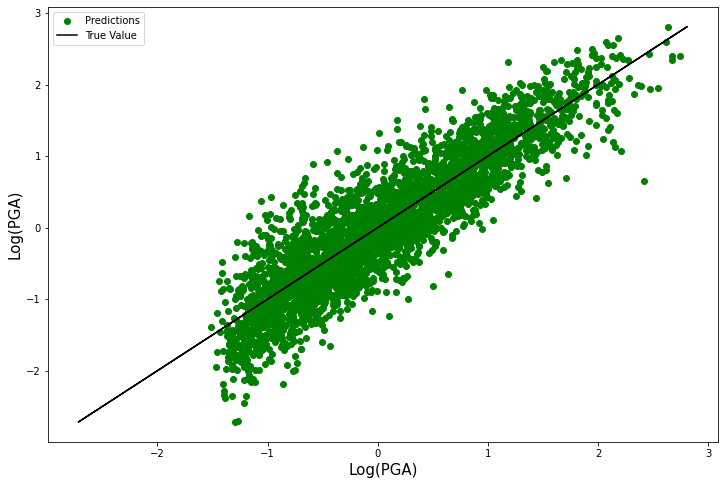

In [374]:
plt.figure(figsize=(12,8))
plt.scatter(y_pred,y1_test,label='Predictions',color='green')
plt.plot(y1_test,y1_test,label='True Value',color='black')
plt.xlabel('Log(PGA)',size=15)
plt.ylabel('Log(PGA)',size=15)
plt.legend()
plt.show()

In [115]:
tot=sum(m)**0.5

In [358]:
tot/len(y_pred)

0.2385501344847274

# Build a GAN for time series

#### The inputs are same for both networks but in this network the GAN model produces a three component time histories

In [292]:
maxi=60000

In [293]:
HNZ_ACC   = "E:\\Final Review\\ACC\\HNZ1\\"
HNN_ACC   = "E:\\Final Review\\ACC\\HNN\\"
HNE_ACC   = "E:\\Final Review\\ACC\\HNE\\"

In [294]:
y=[]
    
x=[]

stopped=[0]

def get_batch(m):
    
    
    from scipy import signal
    import numpy as np
    import pandas as pd
    
    for i in range((len(stopped)-1)*100,len(stopped)*100):
        l=[]
        l.append(x11[i])
        l.append(x22[i])
        l.append(x33[i])
        l=np.array(l)
        x.append(l)
        
    for i in range(stopped[-1],23522):
        
        if i in index1 and i in index2 and i in index3:
            
            #print(i,os.listdir(HNN_ACC)[i],': ',100*(len(os.listdir(HNN_ACC)[:i])/len(os.listdir(HNN_ACC))))
            
            df1   = pd.read_table(HNN_ACC+os.listdir(HNN_ACC)[i])
            
            df2   = pd.read_table(HNE_ACC+os.listdir(HNE_ACC)[i])
            
            df3   = pd.read_table(HNZ_ACC+os.listdir(HNZ_ACC)[i])
            
            wave=[]
            
            wave1 = (df1.iloc[63:].values.flatten().astype(float))#/abs(pga1[i])
            
            wave1 = wave1/max(wave1.max(),-wave1.min())
            
            #wave1 = pool(np.array[wave1])
            
            #wave1 = np.array(wave1)
            
            #wave1 = wave1.flatten()
            
            wave1 = np.append(wave1,np.zeros(int(maxi-len(wave1))))
            
            #m1    = np.mean(wave1)
            
            #Wave1 = wave1-m1
            
            #wave1=signal.detrend(wave1)
            
            wave2 = (df2.iloc[63:].values.flatten().astype(float))#/abs(pga2[i])
            
            wave2 = wave2/max(wave2.max(),-wave2.min())
            
            wave2 = np.append(wave2,np.zeros(int(maxi-len(wave2))))
            
            #wave2 = pool(np.array[wave2])
            
            #wave2 = np.array(wave2)
            
            #wave2 = wave2.flatten()
            
            #m2    = np.mean(wave2)
            
            #wave2 = wave2-m2
            
            #wave2 =signal.detrend(wave2)
            
            wave3 = (df3.iloc[63:].values.flatten().astype(float))#/abs(pga3[i])
            
            wave3 = wave3/max(wave3.max(),-wave3.min())
            
            wave3 = np.append(wave3,np.zeros(int(maxi-len(wave3))))
            
            #wave3 = pool(np.array[wave3])
            
            #wave3 = np.array(wave3)
            
            #wave3 = wave3.flatten()
            
            #m3    = np.mean(wave3)
            
            #wave3 = wave3-m3
            
            #wave3 =signal.detrend(wave3)
            
            
            wave.append(wave1)
            
            wave.append(wave2)
            
            wave.append(wave3)
            
            y.append(np.array(wave))
            
            
            #event_name.append(df.keys()[0])
            
            if len(y)%100 == 0 and len(x)%100 ==0 :
                
                m=i
                break
            
            elif i==23521:
            
                m=i
                
                break
    
    print('Data Stopped at :',m)
    
    stopped.append(m)

In [295]:
y=[]
    
x=[]


stopped=[0]

def get_real_batch(m):
    
    
    from scipy import signal
    import numpy as np
    import pandas as pd
    
    for i in range((len(stopped)-1)*100,len(stopped)*100):
        l=[]
        l.append(x11[i])
        l.append(x22[i])
        l.append(x33[i])
        l=np.array(l)
        x.append(l)
        
    for i in range(stopped[-1],23522):
        
        if i in index1 and i in index2 and i in index3:
            
            #print(i,os.listdir(HNN_ACC)[i],': ',100*(len(os.listdir(HNN_ACC)[:i])/len(os.listdir(HNN_ACC))))
            
            df1   = pd.read_table(HNN_ACC+os.listdir(HNN_ACC)[i])
            
            df2   = pd.read_table(HNE_ACC+os.listdir(HNE_ACC)[i])
            
            df3   = pd.read_table(HNZ_ACC+os.listdir(HNZ_ACC)[i])
            
            wave=[]
            
            wave1 = (df1.iloc[63:].values.flatten().astype(float))
            
            #wave1 = wave1/max(wave1.max(),-wave1.min())
            
            #wave1 = pool(np.array[wave1])
            
            #wave1 = np.array(wave1)
            
            #wave1 = wave1.flatten()
            
            #wave1 = np.append(wave1,np.zeros(int(maxi-len(wave1))))
            
            #m1    = np.mean(wave1)
            
            #Wave1 = wave1-m1
            
            #wave1=signal.detrend(wave1)
            
            wave2 = (df2.iloc[63:].values.flatten().astype(float))
            
            #wave2 = wave2/max(wave2.max(),-wave2.min())
            
            #wave2 = np.append(wave2,np.zeros(int(maxi-len(wave2))))
            
            #wave2 = pool(np.array[wave2])
            
            #wave2 = np.array(wave2)
            
            #wave2 = wave2.flatten()
            
            #m2    = np.mean(wave2)
            
            #wave2 = wave2-m2
            
            #wave2 =signal.detrend(wave2)
            
            wave3 = (df3.iloc[63:].values.flatten().astype(float))
            
            #wave3 = wave3/max(wave3.max(),-wave3.min())
            
            #wave3 = np.append(wave3,np.zeros(int(maxi-len(wave3))))
            
            #wave3 = pool(np.array[wave3])
            
            #wave3 = np.array(wave3)
            
            #wave3 = wave3.flatten()
            
            #m3    = np.mean(wave3)
            
            #wave3 = wave3-m3
            
            #wave3 =signal.detrend(wave3)
            
            
            wave.append(wave1)
            
            wave.append(wave2)
            
            wave.append(wave3)
            
            y.append(np.array(wave))
            
            
            #event_name.append(df.keys()[0])
            
            if len(y)%100 == 0 and len(x)%100 ==0 :
                
                m=i
                break
            
            elif i==23521:
            
                m=i
                
                break
    
    print('Data Stopped at :',m)
    
    stopped.append(m)

In [297]:
#get_real_batch(0)

In [298]:
y=np.random.rand(3,6000)

In [299]:
y[0]

array([0.17250818, 0.17158446, 0.03440642, ..., 0.43782654, 0.63253421,
       0.87811503])

### Do FFT

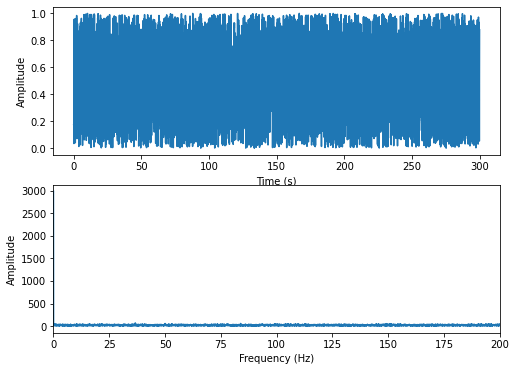

In [300]:
import numpy as np

# generate some sample data
signal=y[0]
N = len(signal)
t = np.linspace(0,N*0.05,N) 

# compute the Fourier transform
freqs = np.fft.fftfreq(N, t[1] - t[0])
fft = np.fft.fft(signal)
# plot the signal and its Fourier transform
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.plot(t, signal)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax2.plot(t,np.abs(fft))
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
plt.xlim(0,200)
plt.show()


In [301]:
import numpy as np

# Generate some sample data
data = y[0][0]
time_step = 0.05
period = len(data)
time_vec = np.arange(0, period*time_step, time_step)



# Compute the FFT
fft_data = np.fft.fft(data)

# Compute the frequency vector
freqs = np.fft.fftfreq(len(data), time_step)

# Plot the results
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
ax1.plot(time_vec, data)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
sns.scatterplot(freqs, np.abs(fft_data))
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Magnitude')
plt.xlim(0,)
plt.show()

TypeError: object of type 'numpy.float64' has no len()

In [157]:
np.linspace(0, 300, N).

(300,)

In [ ]:
plt.plot(y1[0][2])
plt.xlim(0,15000)

In [ ]:
plt.plot(y[0][2])
plt.xlim(0,15000)

In [ ]:
y[0][2].mean()

In [ ]:
plt.plot(y[0][0])
plt.xlim(0,30000)

In [ ]:
plt.plot(y[0][1])
plt.xlim(0,30000)

In [ ]:
plt.plot(y[0][2])
plt.xlim(0,30000)

In [309]:
import tensorflow as tf
from keras.layers import Input, Dense, LeakyReLU, Dropout
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import KLDivergence,BinaryCrossentropy
from tensorflow.keras.layers import Dense,Reshape,Dropout,LeakyReLU,Flatten,BatchNormalization,MaxPool2D,AveragePooling2D,AveragePooling1D,Conv1D,Conv1DTranspose,Conv2D,Conv2DTranspose
from tensorflow.python.eager.backprop import GradientTape as tape

In [64]:
#x=np.array(x)

In [65]:
x = np.array(x)
y = np.array(y)

In [66]:
x.shape

(0,)

In [384]:
y.shape

(33, 3, 60000)

In [385]:
k=pool(y)

In [387]:
k=np.array(k)
    
k=k.reshape(33, 3, 6000)

ValueError: cannot reshape array of size 59400 into shape (33,3,6000)

(0.0, 300.0)

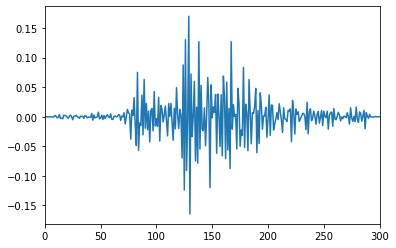

In [390]:
plt.plot(k[0][0])
plt.xlim(0,300)

(0.0, 15000.0)

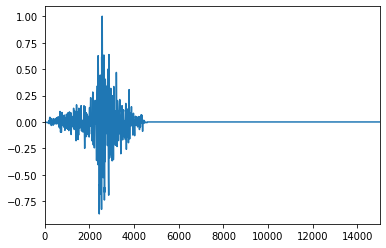

In [241]:
plt.plot(y[0][0])
plt.xlim(0,15000)

# Loss

In [163]:
def wasserstein_loss(y_true, y_pred):
    #y_true=y_true.astype(float)
    #y_pred=y_pred.astype(float)
    return K.mean(y_true* y_pred)

#### Build the Generator 

In [164]:
pool=Sequential()
pool.add(AveragePooling2D(pool_size=(1,10),input_shape=(3,60000,1)))
#pool.add(Flatten())

In [165]:
pool.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling2d_1 (Averag  (None, 3, 6000, 1)       0         
 ePooling2D)                                                     
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [386]:
generator=Sequential()
generator.add(Reshape([3,4,1],input_shape=[3,4]))
generator.add(Dense(4,activation='relu'))
generator.add(Dropout(0.3))
#generator.add(Dense(8,activation='relu'))
#generator.add(Dropout(0.3))
#generator.add(Conv2DTranspose(filters=2,kernel_size=(3,3),strides=(1,1),padding='valid',activation=LeakyReLU(0.2)))
#generator.add(BatchNormalization())
generator.add(Conv2DTranspose(filters=4,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))
generator.add(BatchNormalization())
generator.add(Dropout(0.3))
##generator.add(Conv2DTranspose(filters=9,kernel_size=(3,3),strides=(1,1),padding='valid',activation=LeakyReLU(0.2)))
##generator.add(BatchNormalization())
##generator.add(Dropout(0.3))
##generator.add(Conv2DTranspose(filters=120,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))
##generator.add(BatchNormalization())
generator.add(Flatten())
generator.add(Reshape([3,40]))
generator.add(Dense(6000,activation='linear'))
#generator.add(BatchNormalization())

In [352]:
generator.compile(optimizer=Adam(learning_rate=0.001),loss=KLDivergence)

In [353]:
generator.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_17 (Reshape)        (None, 3, 4, 1)           0         
                                                                 
 dense_51 (Dense)            (None, 3, 4, 4)           8         
                                                                 
 dropout_44 (Dropout)        (None, 3, 4, 4)           0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 5, 6, 4)          148       
 ranspose)                                                       
                                                                 
 batch_normalization_6 (Batc  (None, 5, 6, 4)          16        
 hNormalization)                                                 
                                                                 
 dropout_45 (Dropout)        (None, 5, 6, 4)         

#### Build the Discriminator

In [354]:
discriminator=Sequential()
discriminator.add(Reshape([3,6000,1],input_shape=(3,6000)))
discriminator.add(Dense(50,activation=LeakyReLU(0.2),input_shape=(3,6000,1)))
discriminator.add(Dropout(0.6))
#discriminator.add(AveragePooling2D(pool_size=(3,10)))
discriminator.add(Conv2D(filters=5,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
discriminator.add(Dropout(0.6))
discriminator.add(Conv2D(filters=5,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
discriminator.add(Dropout(0.6))
#discriminator.add(MaxPool2D(pool_size=(1,20)))
discriminator.add(Flatten())
#discriminator.add(Dense(10,activation='relu'))
#discriminator.add(Dropout(0.6))
discriminator.add(Dense(3,activation='relu'))
discriminator.add(Dropout(0.6))
discriminator.add(Dense(1,activation='tanh'))

In [355]:
#discriminator = build_discriminator()
discriminator.compile(optimizer=Adam(learning_rate=0.001),loss=wasserstein_loss)

In [356]:
discriminator.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_19 (Reshape)        (None, 3, 6000, 1)        0         
                                                                 
 dense_53 (Dense)            (None, 3, 6000, 50)       100       
                                                                 
 dropout_46 (Dropout)        (None, 3, 6000, 50)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 6000, 5)        2255      
                                                                 
 dropout_47 (Dropout)        (None, 3, 6000, 5)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 6000, 5)        230       
                                                                 
 dropout_48 (Dropout)        (None, 3, 6000, 5)      

In [357]:
#del discriminator

# Build the GAN model

In [358]:
GAN=Sequential([generator,discriminator])

In [359]:
GAN.layers[1].summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_19 (Reshape)        (None, 3, 6000, 1)        0         
                                                                 
 dense_53 (Dense)            (None, 3, 6000, 50)       100       
                                                                 
 dropout_46 (Dropout)        (None, 3, 6000, 50)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 6000, 5)        2255      
                                                                 
 dropout_47 (Dropout)        (None, 3, 6000, 5)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 6000, 5)        230       
                                                                 
 dropout_48 (Dropout)        (None, 3, 6000, 5)      

In [360]:
GAN.layers[0].summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_17 (Reshape)        (None, 3, 4, 1)           0         
                                                                 
 dense_51 (Dense)            (None, 3, 4, 4)           8         
                                                                 
 dropout_44 (Dropout)        (None, 3, 4, 4)           0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 5, 6, 4)          148       
 ranspose)                                                       
                                                                 
 batch_normalization_6 (Batc  (None, 5, 6, 4)          16        
 hNormalization)                                                 
                                                                 
 dropout_45 (Dropout)        (None, 5, 6, 4)         

# Train the GAN

In [361]:
GAN.compile(optimizer=Adam(learning_rate=0.001))

In [362]:
y_batch[0].shape

(20, 3, 6000)

In [381]:
g_losses=[]
d_losses=[]
X_test=[]
Y_test=[]
epochs=500
batch_size=20
stopped=[0]
total_loss=[]
X_test=[]
Y_test=[]
# Define the optimizer for the generator and discriminator
generator_optimizer = tf.keras.optimizers.Adam(1e-3)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-3)

### Pretrain the generator

In [345]:
from keras import backend as K

In [379]:
while stopped[-1] <= len(os.listdir(HNN_ACC)):
    
    if stopped[-1]==23521:
        break
    print('Getting Batch of Index starting from ', stopped[-1] )
    x=[]
    y=[]
    #X_test=[]
    #Y_test=[]
    
    get_batch(stopped[-1])
    
    x=np.array(x)
    
    y=np.array(y)
    
    y=pool(y)
    
    y=np.array(y)
    
    y=y.reshape(100, 3, 6000)
    
    print('Batch Imported')
    
    print('Dividing for testing and training...')
    
    #S = MinMaxScaler()
    
    #x = S.fit_transform(x)
    
    X_train,x_test, Y_train, y_test = train_test_split(x,y,test_size=0.02,random_state=102)
    
    print('Dividing batches to feed into the network')
    
    # Define the size of each sub-array
    
    sub_array_size = batch_size
    
    # Calculate the number of sub-arrays required
    num_sub_arrays = X_train.shape[0] // sub_array_size
    
    # Split the array into sub-arrays of exact equal size
    x_batch = np.split(X_train[:num_sub_arrays * sub_array_size], num_sub_arrays)
    
    #x_batch = S.fit_transform(x_batch)
    
    y_batch = np.split(Y_train[:num_sub_arrays * sub_array_size], num_sub_arrays)
    
    print('Batching Completed')
    
    for j in range(epochs):
        
        print(f"Currently on Epoch  : {j+1}")
        
        for i in range(len(x_batch)):
            
            print(f"Currently on Batch : {i+1}")
            
            #Train discriminator on real data
            
            real_data=y_batch[i]
            
            real_label =np.array([1.0]*batch_size)
            
            d_loss_real=discriminator.train_on_batch(real_data, real_label)
            
            # Train discriminator on Fake data
            
            noise = tf.random.normal([batch_size, 300])
            
            fake_data=generator(noise)
            
            fake_data=np.array(fake_data).reshape(batch_size,3,6000)
            
            fake_label=np.array([-1.0]*batch_size)
            
            d_loss_fake = discriminator.train_on_batch(fake_data,fake_label)
            
            
            with tf.GradientTape() as disc_tape:
                generated_images = generator(noise, training=True)
                real_output = discriminator(real_data, training=True)
                fake_output = discriminator(fake_data, training=True)

                disc_loss = wasserstein_loss(real_output, fake_output)
    
            gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
            
            discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
            
            noise = tf.random.normal([batch_size, 300])
            
            with tf.GradientTape() as gen_tape:
                
                generated_data = generator(noise, training=True)
                
                fake_output = discriminator(generated_data, training=True)

                gen_loss = wasserstein_loss(tf.ones_like(fake_output), fake_output)

            gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
            
            generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

        # Print the loss after each epoch
        print('Epoch {}: Discriminator Loss: {}, Generator Loss: {}'.format(j + 1, disc_loss, gen_loss))
        
            
#            # Calculate the gradient penalty
#            
#            alpha = np.random.rand(batch_size,1,1)
#            
#            interpolates = alpha * real_data + (1 - alpha) * fake_data
#            
#            gradients =K.gradients(discriminator(interpolates), [interpolates])[0]
#            
#            slopes = K.sqrt(K.sum(K.square(gradients), axis=1))
#            
#            gradient_penalty = K.mean((slopes - 1) ** 2)

#            
#            
#            # Train the discriminator with the gradient penalty
#            
#            d_loss = d_loss_fake - d_loss_real
#            
#            d_loss += 10 * gradient_penalty
#            
#            discriminator.trainable_weights = discriminator_weights
#            
#            ## train the Generator in GAN

#            g_loss=GAN.train_on_batch(x_batch[i],real_label)
#    
#            # Print the losses for each step
#            
#            print(f"Step {i+1}/{len(x_batch)} - D_loss: {d_loss}, G_loss: {g_loss}")
#            
#    #X_test.append(x_test)
#            
#    #Y_test.append(y_test)
#                
#    del X_train,x_test, Y_train, y_test,x,y
#    
    generator.save('3D_generator.h5')
#    
print("Training Complete")

Getting Batch of Index starting from  0
Data Stopped at : 816
Batch Imported
Dividing for testing and training...
Dividing batches to feed into the network
Batching Completed
Currently on Epoch  : 1
Currently on Batch : 1


ValueError: Input 0 of layer "sequential_25" is incompatible with the layer: expected shape=(None, 3, 4), found shape=(20, 300)

In [383]:
while stopped[-1] <= len(os.listdir(HNN_ACC)):
    
    if stopped[-1]==23521:
        break
    print('Getting Batch of Index starting from ', stopped[-1] )
    x=[]
    y=[]
    #X_test=[]
    #Y_test=[]
    
    get_batch(stopped[-1])
    
    x=np.array(x)
    
    y=np.array(y)
    
    y=pool(y)
    
    y=np.array(y)
    
    y=y.reshape(100, 3, 6000)
    
    print('Batch Imported')
    
    print('Dividing for testing and training...')
    
    #S = MinMaxScaler()
    
    #x = S.fit_transform(x)
    
    X_train,x_test, Y_train, y_test = train_test_split(x,y,test_size=0.02,random_state=102)
    
    print('Dividing batches to feed into the network')
    
    # Define the size of each sub-array
    
    sub_array_size = batch_size
    
    # Calculate the number of sub-arrays required
    num_sub_arrays = X_train.shape[0] // sub_array_size
    
    # Split the array into sub-arrays of exact equal size
    x_batch = np.split(X_train[:num_sub_arrays * sub_array_size], num_sub_arrays)
    
    #x_batch = S.fit_transform(x_batch)
    
    y_batch = np.split(Y_train[:num_sub_arrays * sub_array_size], num_sub_arrays)
    
    print('Batching Completed')
    
    for j in range(epochs):
        
        print(f"Currently on Epoch  : {j+1}")
        
        for i in range(len(x_batch)):
            
            print(f"Currently on Batch : {i+1}")
            
            #Train discriminator on real data
            
            real_data=y_batch[i]
            
            real_label =np.array([1.0]*batch_size)
            
            d_loss_real=discriminator.train_on_batch(real_data, real_label)
            
            # Train discriminator on Fake data
            
            fake_data=generator(x_batch[i])
            
            fake_data=np.array(fake_data).reshape(batch_size,3,6000)
            
            fake_label=np.array([-1.0]*batch_size)
            
            d_loss_fake = discriminator.train_on_batch(fake_data,fake_label)
            
            
            with tf.GradientTape() as disc_tape:
                generated_images = generator(x_batch[i], training=True)
                real_output = discriminator(real_data, training=True)
                fake_output = discriminator(fake_data, training=True)

                disc_loss = wasserstein_loss(real_output, fake_output)
    
            gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
            
            discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
            
            noise = tf.random.normal([batch_size, 100])
            
            with tf.GradientTape() as gen_tape:
                
                generated_data = generator(x_batch[i], training=True)
                
                fake_output = discriminator(generated_data, training=True)

                gen_loss = wasserstein_loss(tf.ones_like(fake_output), fake_output)

            gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
            
            generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

        # Print the loss after each epoch
        print('Epoch {}: Discriminator Loss: {}, Generator Loss: {}'.format(j + 1, disc_loss, gen_loss))
    break
        
        
            
#            # Calculate the gradient penalty
#            
#            alpha = np.random.rand(batch_size,1,1)
#            
#            interpolates = alpha * real_data + (1 - alpha) * fake_data
#            
#            gradients =K.gradients(discriminator(interpolates), [interpolates])[0]
#            
#            slopes = K.sqrt(K.sum(K.square(gradients), axis=1))
#            
#            gradient_penalty = K.mean((slopes - 1) ** 2)

#            
#            
#            # Train the discriminator with the gradient penalty
#            
#            d_loss = d_loss_fake - d_loss_real
#            
#            d_loss += 10 * gradient_penalty
#            
#            discriminator.trainable_weights = discriminator_weights
#            
#            ## train the Generator in GAN

#            g_loss=GAN.train_on_batch(x_batch[i],real_label)
#    
#            # Print the losses for each step
#            
#            print(f"Step {i+1}/{len(x_batch)} - D_loss: {d_loss}, G_loss: {g_loss}")
#            
#    #X_test.append(x_test)
#            
#    #Y_test.append(y_test)
#                
#    del X_train,x_test, Y_train, y_test,x,y
#    
    generator.save('3D_generator.h5')
#    
print("Training Complete")


Getting Batch of Index starting from  816


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [261]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [326]:
y_test.shape

(2, 3, 6000)

(0.0, 2000.0)

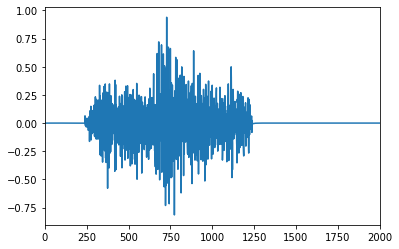

In [272]:
plt.plot(y_test[1][1])
plt.xlim(0,2000)

In [373]:
y_pred=generator.predict(x_test)

1/1 [==============================] - 0s 16ms/step


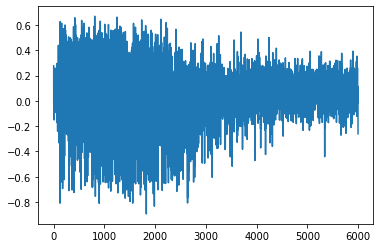

In [377]:
plt.plot(y_pred[0][2]/max(y_pred.max(),abs(y_pred.min())))

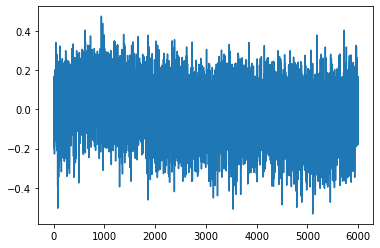

In [229]:
k=y_pred[0][2]-np.mean(y_pred[0][2])
plt.plot(k)

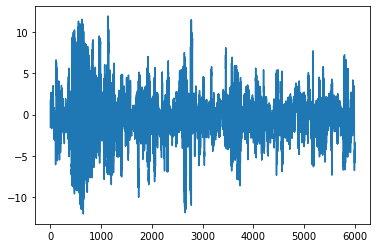

In [367]:
plt.plot(y_pred[0][0])

In [349]:
generator.trainable

True

In [338]:
x=np.array(x)
y=np.array(y)

In [339]:
len(y)

100

In [340]:
y=pool(y)
y=np.array(y)

In [341]:
len(y)

100

In [342]:
y=y.reshape(100,3,6000)

In [343]:
y.max()

0.998376

In [389]:
g_losses=[]
d_losses=[]
X_test=[]
Y_test=[]
epochs=5
batch_size=30
stopped=[0]
total_loss=[]
X_test=[]
Y_test=[]

In [235]:
import tensorflow as tf

# Define your model and optimizer
model = MyModel()
optimizer = tf.keras.optimizers.Adam()

# Define the two losses you want to update
loss1_fn = tf.keras.losses.MeanSquaredError()
loss2_fn = tf.keras.losses.BinaryCrossentropy()

# Start the training loop
for epoch in range(num_epochs):
    # Iterate over the batches in the dataset
    for batch in dataset:
        with tf.GradientTape() as tape:
            # Get the predictions for the current batch
            predictions = model(batch[0])

            # Calculate the two losses for the current batch
            loss1 = loss1_fn(batch[1], predictions)
            loss2 = loss2_fn(batch[2], predictions)

            # Calculate the total loss for the current batch
            total_loss = loss1 + loss2

        # Calculate the gradients of the total loss with respect to the trainable variables
        gradients = tape.gradient(total_loss, model.trainable_variables)

        # Update the trainable variables using the gradients and the optimizer
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Print the losses at the end of each epoch
    print(f"Epoch {epoch + 1}: Loss1 = {loss1}, Loss2 = {loss2}")


In [391]:
optimizer = tf.keras.optimizers.Adam()
generator.compile()
# Define the two losses you want to update
loss1_fn = tf.keras.losses.MeanSquaredError()
loss2_fn = tf.keras.losses.MeanAbsoluteError()
loss3_fn = tf.keras.losses.KLDivergence()
loss4_fn = wasserstein_loss
while stopped[-1] <= len(os.listdir(HNN_ACC)):
    if stopped[-1]==23521:
        break
    print('Getting Batch of Index starting from ', stopped[-1] )
    x=[]
    y=[]
    X_test=[]
    Y_test=[]
    
    get_batch(stopped[-1])
    
    x=np.array(x)
    
    y=np.array(y)
    
    y=pool(y)
    
    y=np.array(y)
    
    y=y.reshape(100, 3, 6000)
    
    print('Batch Imported')
    
    print('Dividing for testing and training...')
    
    #S = StandardScaler()
    
    #x = S.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)
   #Do the Batching
    sub_array_size = batch_size
    
    # Calculate the number of sub-arrays required
    num_sub_arrays = x_train.shape[0] // sub_array_size
    
    # Split the array into sub-arrays of exact equal size
    x_batch = np.split(x_train[:num_sub_arrays * sub_array_size], num_sub_arrays)
    
    #x_batch = S.fit_transform(x_batch)
    
    y_batch = np.split(y_train[:num_sub_arrays * sub_array_size], num_sub_arrays)
    
    print('Batching Completed')
    
    for epoch in range(100):
    # Iterate over the batches in the dataset
     for i in range(len(x_batch)):
        with tf.GradientTape() as tape:
            # Get the predictions for the current batch
            predictions = generator(x_batch[i])

            # Calculate the two losses for the current batch
            loss1 = loss1_fn(y_batch[i], predictions)
            loss2 = loss2_fn(y_batch[i], predictions)
            loss3 = loss3_fn(y_batch[i], predictions)
            loss4 = loss4_fn(y_batch[i], predictions)
            # Calculate the total loss for the current batch
            total_loss = loss1 + loss2

        # Calculate the gradients of the total loss with respect to the trainable variables
        gradients = tape.gradient(total_loss, generator.trainable_variables)

        # Update the trainable variables using the gradients and the optimizer
        optimizer.apply_gradients(zip(gradients, generator.trainable_variables))

    # Print the losses at the end of each epoch
     print(f"Epoch {epoch + 1}: Loss1 = {loss1}, Loss2 = {loss2}, Loss3 = {loss3}, Loss4 = {loss4}")
    
    generator.save('Pretrained.h5')
    
    X_test=np.append(X_test,x_test)
    
    Y_test=np.append(Y_test,y_test)

Getting Batch of Index starting from  816
Data Stopped at : 1091
Batch Imported
Dividing for testing and training...
Batching Completed
Epoch 1: Loss1 = 0.005859663709998131, Loss2 = 0.03097485937178135, Loss3 = 703.29150390625, Loss4 = -6.499936375803372e-07
Epoch 2: Loss1 = 0.005820030812174082, Loss2 = 0.02999848872423172, Loss3 = 700.824951171875, Loss4 = 3.9729975469526835e-06
Epoch 3: Loss1 = 0.005795939825475216, Loss2 = 0.02948634698987007, Loss3 = 692.6876831054688, Loss4 = 8.884023372957017e-06
Epoch 4: Loss1 = 0.005778303369879723, Loss2 = 0.029071617871522903, Loss3 = 683.734619140625, Loss4 = 1.3457091881718952e-05
Epoch 5: Loss1 = 0.005763679277151823, Loss2 = 0.02866463176906109, Loss3 = 677.1953125, Loss4 = 1.7520464098197408e-05
Epoch 6: Loss1 = 0.005751464050263166, Loss2 = 0.028295330703258514, Loss3 = 671.4437255859375, Loss4 = 2.1040405044914223e-05
Epoch 7: Loss1 = 0.00574150076135993, Loss2 = 0.02798748016357422, Loss3 = 665.9210815429688, Loss4 = 2.4020217097131

Epoch 69: Loss1 = 0.005598286632448435, Loss2 = 0.025934796780347824, Loss3 = 575.0111694335938, Loss4 = 0.00010579756053630263
Epoch 70: Loss1 = 0.005595856346189976, Loss2 = 0.025926973670721054, Loss3 = 574.1790161132812, Loss4 = 0.00010754551476566121
Epoch 71: Loss1 = 0.0055933003313839436, Loss2 = 0.025918934494256973, Loss3 = 572.71533203125, Loss4 = 0.00010940220090560615
Epoch 72: Loss1 = 0.00559074804186821, Loss2 = 0.025910966098308563, Loss3 = 571.6732788085938, Loss4 = 0.00011125871969852597
Epoch 73: Loss1 = 0.005588201805949211, Loss2 = 0.02590317279100418, Loss3 = 570.2369995117188, Loss4 = 0.00011310431727906689
Epoch 74: Loss1 = 0.0055855619721114635, Loss2 = 0.02589503861963749, Loss3 = 568.9301147460938, Loss4 = 0.00011501851986395195
Epoch 75: Loss1 = 0.005583016201853752, Loss2 = 0.02588742785155773, Loss3 = 567.9757690429688, Loss4 = 0.00011687233200063929
Epoch 76: Loss1 = 0.005580384749919176, Loss2 = 0.025879258289933205, Loss3 = 566.5360717773438, Loss4 = 0.0

Epoch 37: Loss1 = 0.003228553803637624, Loss2 = 0.013943343423306942, Loss3 = 368.850341796875, Loss4 = 9.067059181688819e-06
Epoch 38: Loss1 = 0.003228556364774704, Loss2 = 0.013941372744739056, Loss3 = 370.5216064453125, Loss4 = 9.056202543433756e-06
Epoch 39: Loss1 = 0.0032284739427268505, Loss2 = 0.01393468864262104, Loss3 = 370.85504150390625, Loss4 = 9.087850230571348e-06
Epoch 40: Loss1 = 0.0032284276094287634, Loss2 = 0.013933994807302952, Loss3 = 371.2059020996094, Loss4 = 9.105336175707635e-06
Epoch 41: Loss1 = 0.003228378714993596, Loss2 = 0.013929743319749832, Loss3 = 369.3340759277344, Loss4 = 9.123459676629864e-06
Epoch 42: Loss1 = 0.00322829675860703, Loss2 = 0.013928046450018883, Loss3 = 371.06951904296875, Loss4 = 9.159070941677783e-06
Epoch 43: Loss1 = 0.003228273708373308, Loss2 = 0.01392211765050888, Loss3 = 369.89453125, Loss4 = 9.16665158001706e-06
Epoch 44: Loss1 = 0.003228183835744858, Loss2 = 0.013919631950557232, Loss3 = 370.6336669921875, Loss4 = 9.2087584562

Data Stopped at : 1696
Batch Imported
Dividing for testing and training...
Batching Completed
Epoch 1: Loss1 = 0.003867468563839793, Loss2 = 0.019397292286157608, Loss3 = 576.3967895507812, Loss4 = -4.562237450045359e-07
Epoch 2: Loss1 = 0.0038665463216602802, Loss2 = 0.01938970759510994, Loss3 = 565.2510986328125, Loss4 = -8.388201422349084e-08
Epoch 3: Loss1 = 0.0038652056828141212, Loss2 = 0.019376756623387337, Loss3 = 558.7896728515625, Loss4 = 4.756814462325565e-07
Epoch 4: Loss1 = 0.0038637893740087748, Loss2 = 0.01936788111925125, Loss3 = 554.9085083007812, Loss4 = 1.0756670008049696e-06
Epoch 5: Loss1 = 0.0038624643348157406, Loss2 = 0.019353540614247322, Loss3 = 551.1976318359375, Loss4 = 1.64223399679031e-06
Epoch 6: Loss1 = 0.0038612568750977516, Loss2 = 0.019344856962561607, Loss3 = 547.8977661132812, Loss4 = 2.1573905542027205e-06
Epoch 7: Loss1 = 0.0038602862041443586, Loss2 = 0.019332846626639366, Loss3 = 546.109375, Loss4 = 2.5661406652943697e-06
Epoch 8: Loss1 = 0.0038

Epoch 67: Loss1 = 0.0038495920598506927, Loss2 = 0.019234875217080116, Loss3 = 549.7678833007812, Loss4 = 7.434490726154763e-06
Epoch 68: Loss1 = 0.003849340369924903, Loss2 = 0.019233128055930138, Loss3 = 551.0089111328125, Loss4 = 7.575878498755628e-06
Epoch 69: Loss1 = 0.0038490951992571354, Loss2 = 0.019231796264648438, Loss3 = 548.4345703125, Loss4 = 7.713856575719547e-06
Epoch 70: Loss1 = 0.0038488388527184725, Loss2 = 0.019230354577302933, Loss3 = 550.1226806640625, Loss4 = 7.85735210229177e-06
Epoch 71: Loss1 = 0.003848566673696041, Loss2 = 0.019228097051382065, Loss3 = 547.3369750976562, Loss4 = 8.0092640928342e-06
Epoch 72: Loss1 = 0.003848286811262369, Loss2 = 0.019227134063839912, Loss3 = 546.4447021484375, Loss4 = 8.168004569597542e-06
Epoch 73: Loss1 = 0.0038480060175061226, Loss2 = 0.01922503486275673, Loss3 = 544.7061767578125, Loss4 = 8.325429007527418e-06
Epoch 74: Loss1 = 0.0038477377966046333, Loss2 = 0.019223852083086967, Loss3 = 546.2685546875, Loss4 = 8.477895789

Epoch 31: Loss1 = 0.00530360359698534, Loss2 = 0.026528146117925644, Loss3 = 715.3701171875, Loss4 = 1.283841447730083e-05
Epoch 32: Loss1 = 0.005303089506924152, Loss2 = 0.02652585692703724, Loss3 = 713.88427734375, Loss4 = 1.3112335182086099e-05
Epoch 33: Loss1 = 0.005302559118717909, Loss2 = 0.026522954925894737, Loss3 = 714.4998168945312, Loss4 = 1.3397000657278113e-05
Epoch 34: Loss1 = 0.005302004050463438, Loss2 = 0.026519838720560074, Loss3 = 711.986572265625, Loss4 = 1.3698764632863458e-05
Epoch 35: Loss1 = 0.005301428027451038, Loss2 = 0.026516664773225784, Loss3 = 711.6994018554688, Loss4 = 1.401368990627816e-05
Epoch 36: Loss1 = 0.005300837568938732, Loss2 = 0.026514366269111633, Loss3 = 710.2216186523438, Loss4 = 1.4339098015625495e-05
Epoch 37: Loss1 = 0.005300211254507303, Loss2 = 0.026511074975132942, Loss3 = 708.6963500976562, Loss4 = 1.4685892892885022e-05
Epoch 38: Loss1 = 0.005299548618495464, Loss2 = 0.02650793455541134, Loss3 = 709.1283569335938, Loss4 = 1.50536961

Epoch 97: Loss1 = 0.005203924607485533, Loss2 = 0.026154547929763794, Loss3 = 625.7769775390625, Loss4 = 7.304907194338739e-05
Epoch 98: Loss1 = 0.005200852174311876, Loss2 = 0.026145001873373985, Loss3 = 624.1533813476562, Loss4 = 7.505544635932893e-05
Epoch 99: Loss1 = 0.005197727121412754, Loss2 = 0.026134608313441277, Loss3 = 622.96630859375, Loss4 = 7.710300997132435e-05
Epoch 100: Loss1 = 0.005194541998207569, Loss2 = 0.026124829426407814, Loss3 = 621.8502807617188, Loss4 = 7.920584175735712e-05
Getting Batch of Index starting from  2046
Data Stopped at : 2678
Batch Imported
Dividing for testing and training...
Batching Completed
Epoch 1: Loss1 = 0.008772704750299454, Loss2 = 0.037497907876968384, Loss3 = 1081.97509765625, Loss4 = -7.477696044588811e-07
Epoch 2: Loss1 = 0.008770239539444447, Loss2 = 0.03749101608991623, Loss3 = 1076.628173828125, Loss4 = 3.8851416661600524e-07
Epoch 3: Loss1 = 0.00876601506024599, Loss2 = 0.037472620606422424, Loss3 = 1067.318359375, Loss4 = 2.30

Epoch 66: Loss1 = 0.008536227978765965, Loss2 = 0.03667339310050011, Loss3 = 890.5845336914062, Loss4 = 0.00016207699081860483
Epoch 67: Loss1 = 0.008530592545866966, Loss2 = 0.03665526583790779, Loss3 = 888.6875, Loss4 = 0.0001667709875619039
Epoch 68: Loss1 = 0.008524934761226177, Loss2 = 0.036637671291828156, Loss3 = 885.829345703125, Loss4 = 0.00017150795611087233
Epoch 69: Loss1 = 0.008519208058714867, Loss2 = 0.036619480699300766, Loss3 = 883.3381958007812, Loss4 = 0.0001763838663464412
Epoch 70: Loss1 = 0.008513429202139378, Loss2 = 0.036601338535547256, Loss3 = 881.3818359375, Loss4 = 0.00018134720448870212
Epoch 71: Loss1 = 0.00850759632885456, Loss2 = 0.03658284246921539, Loss3 = 878.5277709960938, Loss4 = 0.00018634594744071364
Epoch 72: Loss1 = 0.008501756004989147, Loss2 = 0.03656415268778801, Loss3 = 876.3740234375, Loss4 = 0.00019134784815832973
Epoch 73: Loss1 = 0.008495868183672428, Loss2 = 0.03654571622610092, Loss3 = 873.74072265625, Loss4 = 0.00019643959240056574
Ep

Epoch 33: Loss1 = 0.0022435730788856745, Loss2 = 0.011486722156405449, Loss3 = 333.24761962890625, Loss4 = 2.0968889202777063e-06
Epoch 34: Loss1 = 0.0022436189465224743, Loss2 = 0.01148549746721983, Loss3 = 331.0596008300781, Loss4 = 2.070230266326689e-06
Epoch 35: Loss1 = 0.0022435684222728014, Loss2 = 0.011485959403216839, Loss3 = 332.0652770996094, Loss4 = 2.091685473715188e-06
Epoch 36: Loss1 = 0.002243536990135908, Loss2 = 0.01148176845163107, Loss3 = 328.73675537109375, Loss4 = 2.103824272126076e-06
Epoch 37: Loss1 = 0.0022435507271438837, Loss2 = 0.01148212980479002, Loss3 = 333.2559814453125, Loss4 = 2.0944739844708238e-06
Epoch 38: Loss1 = 0.002243496710434556, Loss2 = 0.011479356326162815, Loss3 = 331.76953125, Loss4 = 2.118826159858145e-06
Epoch 39: Loss1 = 0.00224339053966105, Loss2 = 0.01148053165525198, Loss3 = 333.2724914550781, Loss4 = 2.1721282337239245e-06
Epoch 40: Loss1 = 0.002243369584903121, Loss2 = 0.011478357948362827, Loss3 = 331.27197265625, Loss4 = 2.1819255

Epoch 100: Loss1 = 0.0022380126174539328, Loss2 = 0.011422856710851192, Loss3 = 326.2875061035156, Loss4 = 5.250941740087001e-06
Getting Batch of Index starting from  2948
Data Stopped at : 3259
Batch Imported
Dividing for testing and training...
Batching Completed
Epoch 1: Loss1 = 0.003978688269853592, Loss2 = 0.018875908106565475, Loss3 = 527.0274047851562, Loss4 = 1.0723377954491298e-06
Epoch 2: Loss1 = 0.003976454958319664, Loss2 = 0.018840366974473, Loss3 = 515.8399047851562, Loss4 = 1.5551140677416697e-06
Epoch 3: Loss1 = 0.003973179496824741, Loss2 = 0.01878613419830799, Loss3 = 506.37091064453125, Loss4 = 2.4023197511269245e-06
Epoch 4: Loss1 = 0.003969545476138592, Loss2 = 0.018735356628894806, Loss3 = 499.90960693359375, Loss4 = 3.4890426832134835e-06
Epoch 5: Loss1 = 0.00396604323759675, Loss2 = 0.018685979768633842, Loss3 = 492.6200866699219, Loss4 = 4.724268364952877e-06
Epoch 6: Loss1 = 0.003962929826229811, Loss2 = 0.018650207668542862, Loss3 = 486.03924560546875, Loss4 

Epoch 66: Loss1 = 0.003944152034819126, Loss2 = 0.018491875380277634, Loss3 = 466.9603271484375, Loss4 = 1.8731247109826654e-05
Epoch 67: Loss1 = 0.003943925257772207, Loss2 = 0.018489858135581017, Loss3 = 465.2676086425781, Loss4 = 1.8909604477812536e-05
Epoch 68: Loss1 = 0.003943722229450941, Loss2 = 0.018488684669137, Loss3 = 465.8480529785156, Loss4 = 1.906392390083056e-05
Epoch 69: Loss1 = 0.003943487070500851, Loss2 = 0.018487555906176567, Loss3 = 466.0943603515625, Loss4 = 1.9251414414611645e-05
Epoch 70: Loss1 = 0.00394325191155076, Loss2 = 0.018487416207790375, Loss3 = 466.9543762207031, Loss4 = 1.944010546139907e-05
Epoch 71: Loss1 = 0.003943022806197405, Loss2 = 0.01848682574927807, Loss3 = 466.6051330566406, Loss4 = 1.962703390745446e-05
Epoch 72: Loss1 = 0.003942809533327818, Loss2 = 0.018486134707927704, Loss3 = 466.3381042480469, Loss4 = 1.980351771635469e-05
Epoch 73: Loss1 = 0.003942584153264761, Loss2 = 0.01848617196083069, Loss3 = 465.9176330566406, Loss4 = 1.9990011

Epoch 33: Loss1 = 0.0058610644191503525, Loss2 = 0.025664830580353737, Loss3 = 696.3316650390625, Loss4 = 1.3978679817228112e-05
Epoch 34: Loss1 = 0.005860995035618544, Loss2 = 0.025670120492577553, Loss3 = 695.5547485351562, Loss4 = 1.3984051292936783e-05
Epoch 35: Loss1 = 0.005860913544893265, Loss2 = 0.025665074586868286, Loss3 = 695.4945068359375, Loss4 = 1.3997993846714962e-05
Epoch 36: Loss1 = 0.00586083997040987, Loss2 = 0.025668414309620857, Loss3 = 696.1404418945312, Loss4 = 1.4012988685863093e-05
Epoch 37: Loss1 = 0.005860751960426569, Loss2 = 0.025663143023848534, Loss3 = 698.011962890625, Loss4 = 1.4038625522516668e-05
Epoch 38: Loss1 = 0.005860692821443081, Loss2 = 0.02566508948802948, Loss3 = 694.1510620117188, Loss4 = 1.4052769074623939e-05
Epoch 39: Loss1 = 0.00586063414812088, Loss2 = 0.025663195177912712, Loss3 = 696.1278076171875, Loss4 = 1.406692354066763e-05
Epoch 40: Loss1 = 0.005860554985702038, Loss2 = 0.02566448226571083, Loss3 = 696.5791015625, Loss4 = 1.40914

Epoch 99: Loss1 = 0.005857420619577169, Loss2 = 0.02564677596092224, Loss3 = 690.662841796875, Loss4 = 1.591706313774921e-05
Epoch 100: Loss1 = 0.005857380107045174, Loss2 = 0.025651011615991592, Loss3 = 691.3785400390625, Loss4 = 1.5948708096402697e-05
Getting Batch of Index starting from  3531
Data Stopped at : 3752
Batch Imported
Dividing for testing and training...
Batching Completed
Epoch 1: Loss1 = 0.006082288920879364, Loss2 = 0.02583310566842556, Loss3 = 712.34619140625, Loss4 = 2.3631848762306618e-06
Epoch 2: Loss1 = 0.0060804421082139015, Loss2 = 0.025829093530774117, Loss3 = 710.6727294921875, Loss4 = 2.8117992769693956e-06
Epoch 3: Loss1 = 0.0060776155441999435, Loss2 = 0.02581140026450157, Loss3 = 716.1224975585938, Loss4 = 3.5937525808549253e-06
Epoch 4: Loss1 = 0.006074417848140001, Loss2 = 0.02580299973487854, Loss3 = 716.3602294921875, Loss4 = 4.585334863804746e-06
Epoch 5: Loss1 = 0.006071277894079685, Loss2 = 0.025786103680729866, Loss3 = 713.1759033203125, Loss4 = 5

Epoch 68: Loss1 = 0.006060373969376087, Loss2 = 0.025739341974258423, Loss3 = 705.9212646484375, Loss4 = 1.341008010058431e-05
Epoch 69: Loss1 = 0.006060357205569744, Loss2 = 0.02573501504957676, Loss3 = 707.1429443359375, Loss4 = 1.341495863016462e-05
Epoch 70: Loss1 = 0.006060343235731125, Loss2 = 0.0257375817745924, Loss3 = 706.1492309570312, Loss4 = 1.3428223610389978e-05
Epoch 71: Loss1 = 0.006060334853827953, Loss2 = 0.025736819952726364, Loss3 = 708.4771118164062, Loss4 = 1.343545318377437e-05
Epoch 72: Loss1 = 0.006060331594198942, Loss2 = 0.025737812742590904, Loss3 = 708.0674438476562, Loss4 = 1.343379608442774e-05
Epoch 73: Loss1 = 0.006060323677957058, Loss2 = 0.025734763592481613, Loss3 = 708.2025756835938, Loss4 = 1.3435164873953909e-05
Epoch 74: Loss1 = 0.006060302257537842, Loss2 = 0.025738351047039032, Loss3 = 707.1551513671875, Loss4 = 1.3450639926304575e-05
Epoch 75: Loss1 = 0.0060602822341024876, Loss2 = 0.025734473019838333, Loss3 = 708.247802734375, Loss4 = 1.3463

Epoch 33: Loss1 = 0.003487571142613888, Loss2 = 0.016735641285777092, Loss3 = 476.7518615722656, Loss4 = 5.125178176967893e-06
Epoch 34: Loss1 = 0.003487564157694578, Loss2 = 0.016739271581172943, Loss3 = 477.9070739746094, Loss4 = 5.13433860760415e-06
Epoch 35: Loss1 = 0.0034875869750976562, Loss2 = 0.016735125333070755, Loss3 = 477.0252685546875, Loss4 = 5.127832082507666e-06
Epoch 36: Loss1 = 0.003487583016976714, Loss2 = 0.01673748902976513, Loss3 = 478.16900634765625, Loss4 = 5.132980732014403e-06
Epoch 37: Loss1 = 0.003487569512799382, Loss2 = 0.016734570264816284, Loss3 = 479.25823974609375, Loss4 = 5.140870598552283e-06
Epoch 38: Loss1 = 0.003487539244815707, Loss2 = 0.016737986356019974, Loss3 = 478.2071228027344, Loss4 = 5.159638021723367e-06
Epoch 39: Loss1 = 0.0034875180572271347, Loss2 = 0.016732268035411835, Loss3 = 476.56683349609375, Loss4 = 5.171736574993702e-06
Epoch 40: Loss1 = 0.003487533424049616, Loss2 = 0.01673821173608303, Loss3 = 476.37542724609375, Loss4 = 5.1

Data Stopped at : 4297
Batch Imported
Dividing for testing and training...
Batching Completed
Epoch 1: Loss1 = 0.0039750742726027966, Loss2 = 0.01888902112841606, Loss3 = 549.156005859375, Loss4 = 1.4367657286129543e-06
Epoch 2: Loss1 = 0.003973794169723988, Loss2 = 0.018881551921367645, Loss3 = 540.5361328125, Loss4 = 1.8929830503111589e-06
Epoch 3: Loss1 = 0.003971826285123825, Loss2 = 0.018866226077079773, Loss3 = 536.1832885742188, Loss4 = 2.6265527139912592e-06
Epoch 4: Loss1 = 0.00396960461512208, Loss2 = 0.018861737102270126, Loss3 = 533.489990234375, Loss4 = 3.5386376566748368e-06
Epoch 5: Loss1 = 0.003967481665313244, Loss2 = 0.01885185018181801, Loss3 = 520.1771850585938, Loss4 = 4.518915375228971e-06
Epoch 6: Loss1 = 0.003965678624808788, Loss2 = 0.01884014718234539, Loss3 = 517.2958984375, Loss4 = 5.461504770210013e-06
Epoch 7: Loss1 = 0.003964273724704981, Loss2 = 0.018833786249160767, Loss3 = 517.6853637695312, Loss4 = 6.319727162917843e-06
Epoch 8: Loss1 = 0.003963172435

Epoch 71: Loss1 = 0.003955212887376547, Loss2 = 0.018780233338475227, Loss3 = 509.23809814453125, Loss4 = 1.1608118256845046e-05
Epoch 72: Loss1 = 0.0039550792425870895, Loss2 = 0.01878231205046177, Loss3 = 505.6904602050781, Loss4 = 1.169753431895515e-05
Epoch 73: Loss1 = 0.003954990766942501, Loss2 = 0.018779080361127853, Loss3 = 510.37030029296875, Loss4 = 1.1759701919800136e-05
Epoch 74: Loss1 = 0.00395494420081377, Loss2 = 0.018785960972309113, Loss3 = 510.3365478515625, Loss4 = 1.1825159162981436e-05
Epoch 75: Loss1 = 0.003954727668315172, Loss2 = 0.018779048696160316, Loss3 = 508.2444763183594, Loss4 = 1.193809112010058e-05
Epoch 76: Loss1 = 0.003954560030251741, Loss2 = 0.018778879195451736, Loss3 = 502.1177978515625, Loss4 = 1.2052512829541229e-05
Epoch 77: Loss1 = 0.003954474348574877, Loss2 = 0.01877852901816368, Loss3 = 505.77899169921875, Loss4 = 1.2112001058994792e-05
Epoch 78: Loss1 = 0.0039544375613331795, Loss2 = 0.018782131373882294, Loss3 = 509.58154296875, Loss4 = 1

Epoch 39: Loss1 = 0.004649596754461527, Loss2 = 0.021121390163898468, Loss3 = 593.0667114257812, Loss4 = 1.141864231612999e-05
Epoch 40: Loss1 = 0.0046493783593177795, Loss2 = 0.021122116595506668, Loss3 = 596.5260620117188, Loss4 = 1.1619635188253596e-05
Epoch 41: Loss1 = 0.004649166949093342, Loss2 = 0.02111932635307312, Loss3 = 598.5897827148438, Loss4 = 1.1821583029814065e-05
Epoch 42: Loss1 = 0.004648930858820677, Loss2 = 0.021119609475135803, Loss3 = 599.334228515625, Loss4 = 1.2040725778206252e-05
Epoch 43: Loss1 = 0.004648709204047918, Loss2 = 0.021119972690939903, Loss3 = 598.7178955078125, Loss4 = 1.2257925845915452e-05
Epoch 44: Loss1 = 0.004648494068533182, Loss2 = 0.021118473261594772, Loss3 = 594.6124877929688, Loss4 = 1.2468321074265987e-05
Epoch 45: Loss1 = 0.004648249596357346, Loss2 = 0.02111596241593361, Loss3 = 597.4906005859375, Loss4 = 1.2703528227575589e-05
Epoch 46: Loss1 = 0.00464800838381052, Loss2 = 0.02111627161502838, Loss3 = 598.819580078125, Loss4 = 1.293

Epoch 7: Loss1 = 0.007430572062730789, Loss2 = 0.03127763420343399, Loss3 = 839.4841918945312, Loss4 = 1.3258258150017355e-05
Epoch 8: Loss1 = 0.00742642767727375, Loss2 = 0.03126268461346626, Loss3 = 838.0864868164062, Loss4 = 1.5077675925567746e-05
Epoch 9: Loss1 = 0.007423621602356434, Loss2 = 0.03125116974115372, Loss3 = 839.6334838867188, Loss4 = 1.6766043700044975e-05
Epoch 10: Loss1 = 0.007421647198498249, Loss2 = 0.03124294802546501, Loss3 = 835.5892944335938, Loss4 = 1.8331884348299354e-05
Epoch 11: Loss1 = 0.007420147769153118, Loss2 = 0.03123652935028076, Loss3 = 837.9544067382812, Loss4 = 1.9804729163297452e-05
Epoch 12: Loss1 = 0.00741887092590332, Loss2 = 0.0312309842556715, Loss3 = 835.37744140625, Loss4 = 2.12179384107003e-05
Epoch 13: Loss1 = 0.007417728658765554, Loss2 = 0.031225426122546196, Loss3 = 830.760009765625, Loss4 = 2.2573984097107314e-05
Epoch 14: Loss1 = 0.007416682783514261, Loss2 = 0.03122161701321602, Loss3 = 831.6710205078125, Loss4 = 2.385249899816699

Epoch 77: Loss1 = 0.007347239181399345, Loss2 = 0.030974682420492172, Loss3 = 766.5932006835938, Loss4 = 8.781012002145872e-05
Epoch 78: Loss1 = 0.0073461891151964664, Loss2 = 0.03097088634967804, Loss3 = 766.2288208007812, Loss4 = 8.89166331035085e-05
Epoch 79: Loss1 = 0.007345116697251797, Loss2 = 0.030966388061642647, Loss3 = 765.3194580078125, Loss4 = 9.001510625239462e-05
Epoch 80: Loss1 = 0.007344026584178209, Loss2 = 0.030962379649281502, Loss3 = 765.0592041015625, Loss4 = 9.114784916164353e-05
Epoch 81: Loss1 = 0.007342903409153223, Loss2 = 0.030957847833633423, Loss3 = 764.4949951171875, Loss4 = 9.227674308931455e-05
Epoch 82: Loss1 = 0.007341788150370121, Loss2 = 0.03095395863056183, Loss3 = 763.0942993164062, Loss4 = 9.340066026197746e-05
Epoch 83: Loss1 = 0.007340647280216217, Loss2 = 0.03094998188316822, Loss3 = 762.0191040039062, Loss4 = 9.453653183300048e-05
Epoch 84: Loss1 = 0.007339482195675373, Loss2 = 0.030944697558879852, Loss3 = 761.633056640625, Loss4 = 9.57410593

Epoch 44: Loss1 = 0.007786217145621777, Loss2 = 0.03384425491094589, Loss3 = 880.265625, Loss4 = 5.221519313636236e-05
Epoch 45: Loss1 = 0.007784926798194647, Loss2 = 0.033838797360658646, Loss3 = 879.6880493164062, Loss4 = 5.3157338697928935e-05
Epoch 46: Loss1 = 0.007783612236380577, Loss2 = 0.03383520990610123, Loss3 = 879.3442993164062, Loss4 = 5.412185055320151e-05
Epoch 47: Loss1 = 0.007782300468534231, Loss2 = 0.03383009508252144, Loss3 = 876.5756225585938, Loss4 = 5.510331175173633e-05
Epoch 48: Loss1 = 0.007780974265187979, Loss2 = 0.03382633626461029, Loss3 = 875.2783203125, Loss4 = 5.611541564576328e-05
Epoch 49: Loss1 = 0.007779623381793499, Loss2 = 0.033821579068899155, Loss3 = 874.0133666992188, Loss4 = 5.7123957958538085e-05
Epoch 50: Loss1 = 0.007778256665915251, Loss2 = 0.03381703048944473, Loss3 = 871.99755859375, Loss4 = 5.8161291235592216e-05
Epoch 51: Loss1 = 0.007776894140988588, Loss2 = 0.03381195664405823, Loss3 = 874.6695556640625, Loss4 = 5.9194037021370605e-0

Epoch 12: Loss1 = 0.006399742793291807, Loss2 = 0.0284159854054451, Loss3 = 779.8532104492188, Loss4 = 1.1730326150427572e-05
Epoch 13: Loss1 = 0.006399395875632763, Loss2 = 0.028412265703082085, Loss3 = 783.5358276367188, Loss4 = 1.1791878023359459e-05
Epoch 14: Loss1 = 0.006399084348231554, Loss2 = 0.028409291058778763, Loss3 = 783.8994750976562, Loss4 = 1.1805323083535768e-05
Epoch 15: Loss1 = 0.00639889482408762, Loss2 = 0.02840835228562355, Loss3 = 792.7506713867188, Loss4 = 1.1727804121619556e-05
Epoch 16: Loss1 = 0.006398748140782118, Loss2 = 0.028406113386154175, Loss3 = 806.3195190429688, Loss4 = 1.1620331861195154e-05
Epoch 17: Loss1 = 0.006398697849363089, Loss2 = 0.028403420001268387, Loss3 = 806.616943359375, Loss4 = 1.145970691140974e-05
Epoch 18: Loss1 = 0.006398661993443966, Loss2 = 0.028403600677847862, Loss3 = 804.7594604492188, Loss4 = 1.1299850484647322e-05
Epoch 19: Loss1 = 0.006398651283234358, Loss2 = 0.028401413932442665, Loss3 = 802.7885131835938, Loss4 = 1.114

Epoch 81: Loss1 = 0.006352970376610756, Loss2 = 0.028262071311473846, Loss3 = 802.9085083007812, Loss4 = 4.0039805753622204e-05
Epoch 82: Loss1 = 0.006351872812956572, Loss2 = 0.028258247300982475, Loss3 = 804.8564453125, Loss4 = 4.0834514948073775e-05
Epoch 83: Loss1 = 0.0063508134335279465, Loss2 = 0.02825482375919819, Loss3 = 801.5098266601562, Loss4 = 4.162030745646916e-05
Epoch 84: Loss1 = 0.006349695846438408, Loss2 = 0.028252651914954185, Loss3 = 806.0181274414062, Loss4 = 4.244227602612227e-05
Epoch 85: Loss1 = 0.006348619237542152, Loss2 = 0.028249014168977737, Loss3 = 806.0585327148438, Loss4 = 4.3250940507277846e-05
Epoch 86: Loss1 = 0.006347510498017073, Loss2 = 0.028246428817510605, Loss3 = 804.9962768554688, Loss4 = 4.408961103763431e-05
Epoch 87: Loss1 = 0.00634649395942688, Loss2 = 0.02824430540204048, Loss3 = 800.5596313476562, Loss4 = 4.4866854295833036e-05
Epoch 88: Loss1 = 0.006345425732433796, Loss2 = 0.028241390362381935, Loss3 = 800.286376953125, Loss4 = 4.568284

Epoch 45: Loss1 = 0.006732261274009943, Loss2 = 0.029850289225578308, Loss3 = 816.1759643554688, Loss4 = 1.333712316409219e-05
Epoch 46: Loss1 = 0.006732226815074682, Loss2 = 0.029849328100681305, Loss3 = 815.4905395507812, Loss4 = 1.3355839655559976e-05
Epoch 47: Loss1 = 0.006732195615768433, Loss2 = 0.029847703874111176, Loss3 = 815.6630249023438, Loss4 = 1.3372063222050201e-05
Epoch 48: Loss1 = 0.006732173729687929, Loss2 = 0.02984815649688244, Loss3 = 814.7117919921875, Loss4 = 1.3384635167312808e-05
Epoch 49: Loss1 = 0.006732144393026829, Loss2 = 0.029846973717212677, Loss3 = 815.244873046875, Loss4 = 1.340188828180544e-05
Epoch 50: Loss1 = 0.006732116919010878, Loss2 = 0.029848357662558556, Loss3 = 816.0816650390625, Loss4 = 1.3417842637863941e-05
Epoch 51: Loss1 = 0.006732079200446606, Loss2 = 0.029846904799342155, Loss3 = 816.1198120117188, Loss4 = 1.3439457688946277e-05
Epoch 52: Loss1 = 0.006732041481882334, Loss2 = 0.02984713762998581, Loss3 = 816.2113647460938, Loss4 = 1.34

KeyboardInterrupt: 

In [ ]:
#generator.save('3D_generator.h5')

In [392]:
y_pred=generator.predict(x_test)

1/1 [==============================] - 0s 93ms/step


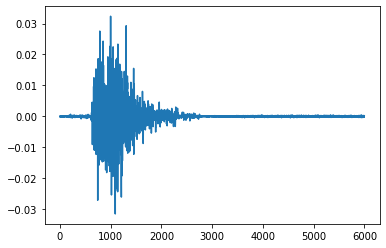

In [393]:
plt.plot(y_pred[6][2])

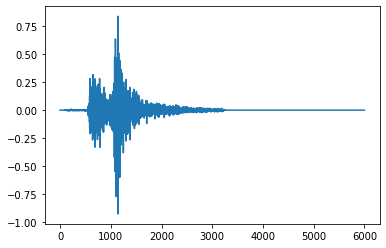

In [338]:
plt.plot(y_test[6][2])

## New Network

In [237]:
# Import necessary libraries
import numpy as np
from keras.layers import Dense, Reshape, Flatten
from keras.models import Sequential
from keras.optimizers import RMSprop,Adam
from keras import backend as K

# Define the dimensions of the input and output arrays
input_dim = 4
output_dim = 6000

# Define the generator model
def build_generator():

    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(output_dim, activation='tanh'))
    model.add(Reshape((output_dim,)))

    return model

# Define the discriminator model
def build_discriminator():

    model = Sequential()
    model.add(Dense(1024, input_dim=output_dim, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1))
    model.add(Flatten())

    return model

# Define the Wasserstein loss function
def wasserstein_loss(y_true, y_pred):
    return K.mean(y_true * y_pred)

# Set up the generator and discriminator models
generator = build_generator()
discriminator = build_discriminator()

# Compile the discriminator model
discriminator.compile(optimizer=RMSprop(lr=0.00005), loss=wasserstein_loss)

# Set the discriminator weights to be non-trainable during generator training
discriminator.trainable = False

# Set up the combined model for training the generator
combined = Sequential()
combined.add(generator)
combined.add(discriminator)
combined.compile(optimizer=RMSprop(lr=0.00005), loss=wasserstein_loss)

# Define the training loop
def train(epochs, batch_size):

    # Load and preprocess the training data
    X_train = np.random.rand(10000, input_dim)

    # Define the number of training steps per epoch
    steps_per_epoch = int(X_train.shape[0] / batch_size)

    # Define the label for real data (1) and generated data (-1)
    real_label = np.ones((batch_size, 1))
    fake_label = -np.ones((batch_size, 1))

    for epoch in range(epochs):

        print(f"Epoch {epoch+1}/{epochs}")

        for step in range(steps_per_epoch):

            # Train the discriminator on real data
            real_data = X_train[step*batch_size : (step+1)*batch_size]
            d_loss_real = discriminator.train_on_batch(real_data, real_label)

            # Train the discriminator on generated data
            noise = np.random.rand(batch_size, input_dim)
            generated_data = generator.predict(noise)
            d_loss_fake = discriminator.train_on_batch(generated_data, fake_label)

            # Calculate the gradient penalty
            alpha = np.random.rand(batch_size, 1,1)
            interpolates = alpha * real_data + (1 - alpha) * generated_data
            gradients = K.gradients(discriminator(interpolates), [interpolates])[0]
            slopes = K.sqrt(K.sum(K.square(gradients), axis=1))
            gradient_penalty = K.mean((slopes - 1) ** 2)

            # Train the discriminator with the gradient penalty
            d_loss = d_loss_fake - d_loss_real
            d_loss += 10 * gradient_penalty
            discriminator.trainable_weights = discriminator_weights
    
            # Train the generator
            noise = np.random.rand(batch_size, input_dim)
            g_loss = combined.train_on_batch(noise, real_label)
    
            # Print the losses for each step
            print(f"Step {step+1}/{steps_per_epoch} - D_loss: {d_loss}, G_loss: {g_loss}")

E:\conda\envs\mytfenv\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [288]:
y_batch[0][0]

array([[1.3862898e-05, 1.7328623e-05, 1.7328623e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [298]:
[[0.34],[0.59],[0.45]]*y_batch[0][0][0]

array([[4.71338546e-06, 5.89173167e-06, 5.89173167e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.17911006e-06, 1.02238873e-05, 1.02238873e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.23830429e-06, 7.79788015e-06, 7.79788015e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [334]:
interpolates = alpha * real_data + (1 - alpha) * fake_data
gradients = K.GradientTape(discriminator(interpolates), [interpolates])[0]

AttributeError: module 'keras.backend' has no attribute 'GradientTape'

In [283]:
K.gradients

<function keras.backend.gradients(loss, variables)>

In [284]:
tf.GradientTape

tensorflow.python.eager.backprop.GradientTape

### Here we compare the results with original values

In [345]:
def get_results(x_test):
    y_pred=generator.predict(x_test)
    k=[]
    for i in y_pred:
        m=[]
        for j in i:
            m.append(j/(max(j.max(),abs(j.min()))))
        k.append(np.array(m))
    return np.array(k)

In [346]:
y_pred=get_results(x_test)

1/1 [==============================] - 0s 16ms/step


In [381]:
def save_samples(y_pred,y_test,x_test):
    for i in range(len(y_pred)):
        pd.DataFrame(y_pred[i]).to_csv('genwave_'+str(i+1)+'.csv')
        pd.DataFrame(y_test[i]).to_csv('realwave_'+str(i+1)+'.csv')
    pd.DataFrame(x_test.reshape(len(x_test)*3,4)).to_csv('Inputs0.csv')

In [382]:
save_samples(y_pred,y_test,x_test)

In [354]:
sample_wave.to_csv('samplewave.csv')

### Do Time Domain and Frequency Domain Comparisions

In [587]:
import numpy as np

# generate some sample data
i=1
signal=y[i][0]**2+y[i][0]
N =len(signal)
t = np.linspace(0,N*0.05,N) 

# compute the Fourier transform
freqs = np.fft.fftfreq(N, t[1] - t[0])
fft = np.fft.fft(signal)
# plot the signal and its Fourier transform
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.plot(t, signal)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax2.plot(t,np.abs(fft))
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
plt.xlim(0,200)
plt.show()

IndexError: invalid index to scalar variable.

## PGA vs Distance 

In [333]:
#HNE_inputs=HNE_inputs.drop('index',axis=1)
HNE_inputs

,index,Magnitude,Distance,Depth,PGA,Vs30,log(PGA),log(Depth),log(Distance),log(Magnitude),log(Vs30)
514,534,6.7,3540000.0,460000.0,178.752899,24000,2.252253,5.662758,6.549003,0.826075,4.380211
515,536,6.7,340000.0,1000000.0,-708.032349,16000,2.850053,6.000000,5.531479,0.826075,4.204120
530,563,5.6,1050000.0,360000.0,-494.290771,24000,2.693983,5.556303,6.021189,0.748188,4.380211
538,576,5.6,2870000.0,360000.0,25.015657,60000,1.398212,5.556303,6.457882,0.748188,4.778151
540,581,5.6,1790000.0,360000.0,50.771336,24000,1.705619,5.556303,6.252853,0.748188,4.380211
...,...,...,...,...,...,...,...,...,...,...,...
15189,23513,5.1,14630000.0,890000.0,-0.928656,60000,-0.032145,5.949390,7.165244,0.707570,4.778151
15190,23514,5.1,780000.0,1800000.0,-204.232559,60000,2.310125,6.255273,5.892095,0.707570,4.778151
15191,23516,4.2,1610000.0,1280000.0,-7.455774,60000,0.872493,6.107210,6.206826,0.623249,4.778151
15192,23517,4.6,2660000.0,1570000.0,-12.627666,60000,1.101323,6.195900,6.424882,0.662758,4.778151


In [605]:
HNE_pred=pd.DataFrame([])
HNE_pred['log(Distance)']=HNE_inputs['log(Distance)']
HNE_pred['Magnitude']=HNE_inputs['Magnitude']
HNE_pred['Depth']=HNE_inputs['Depth']
HNE_pred['log(Vs30)']=HNE_inputs['log(Vs30)']
HNE_pred['Vs30']=HNE_inputs['Vs30']
HNE_pred['log(PGA)']=HNE_inputs['log(PGA)']
HNE_pred['Distance']=HNE_inputs['Distance']
HNE_pred['PGA']=HNE_inputs['PGA']
HNE_pred=HNE_pred[HNE_pred['Magnitude']> 4]
HNE_pred=HNE_pred[HNE_pred['Magnitude']< 5]
HNE_pred=HNE_pred[HNE_pred['Distance'] < km_cm(200) ]
HNE_pred=HNE_pred[HNE_pred['Depth'] < km_cm(20)  ]
HNE_pred=HNE_pred[HNE_pred['Vs30'] <24000 ]
HNE_pred=HNE_pred[HNE_pred['Vs30'] >9999 ]
#HNE_pred=HNE_pred.drop('index',axis=1)
PGA=HNE_pred['PGA'].values
HNE_pred=HNE_pred.drop('PGA',axis=1)
y_real=HNE_pred['log(PGA)'].values
D=HNE_pred['log(Distance)'].values
HNE_pred=HNE_pred.drop('log(PGA)',axis=1)
#HNE_pred=HNE_pred.drop('log(Depth)',axis=1)
#HNE_pred=HNE_pred.drop('log(Magnitude)',axis=1)
HNE_pred=HNE_pred.drop('Distance',axis=1)
HNE_pred=HNE_pred.drop('Vs30',axis=1)
HNE_pred

,log(Distance),Magnitude,Depth,log(Vs30)
4465,6.184691,4.8,1000000.0,4.20412
4661,6.563481,4.9,340000.0,4.20412
4666,6.874482,4.9,870000.0,4.20412
4670,5.908485,4.9,1650000.0,4.00000
4897,6.424882,4.1,1080000.0,4.00000
...,...,...,...,...
10924,7.210051,4.3,900000.0,4.20412
10925,7.213518,4.2,1090000.0,4.20412
13166,6.996074,4.7,1110000.0,4.20412
13171,6.990339,4.1,1040000.0,4.20412


In [606]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [607]:
S= StandardScaler()

In [608]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [609]:
model = load_model('HNE_model.h5')

In [626]:
x=S.fit_transform(x1_test)
x

array([[ 7.78550882e-02,  1.39441920e-01,  1.58900691e+00,
         1.08203485e+00],
       [-4.27065964e-01, -9.04721609e-01,  4.58100156e-01,
         1.24213140e-01],
       [-5.72165517e-04, -6.06389172e-01,  4.83802582e-01,
         1.08203485e+00],
       ...,
       [ 7.07106588e-01,  2.52610141e+00, -5.18592039e-01,
         1.08203485e+00],
       [-1.42075124e+00,  5.86940575e-01,  5.86612287e-01,
         1.24213140e-01],
       [ 9.53402524e-01,  2.22776898e+00, -1.33055647e-01,
         1.08203485e+00]])

In [633]:
y_pred=model.predict(x1_test)

104/104 [==============================] - 0s 982us/step


In [632]:
y_pred=y_pred.flatten()
y_pred

array([ 0.11784732,  0.09494662, -0.16932662, ...,  0.5890765 ,
        1.3696823 ,  0.25366884], dtype=float32)

In [634]:
y1_test

array([ 0.61393913, -0.1573527 , -0.80493378, ...,  0.49796022,
        1.48070514,  0.27230886])

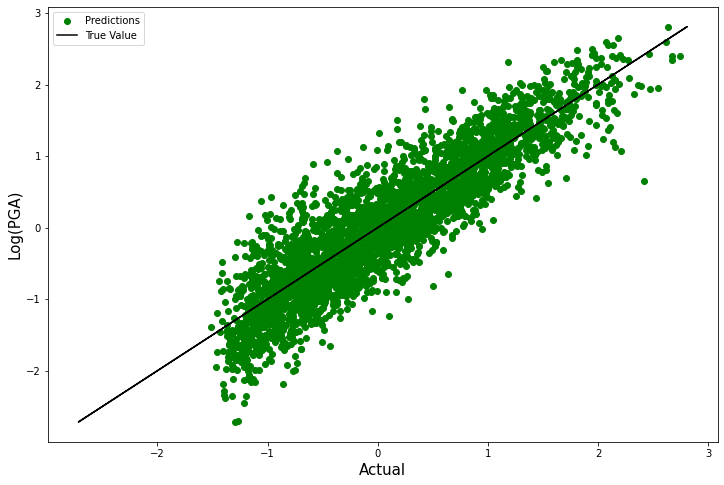

In [637]:
plt.figure(figsize=(12,8))
plt.scatter(y_pred,y1_test,label='Predictions',color='green')
plt.plot(y1_test,y1_test,label='True Value',color='black')
plt.xlabel('Actual',size=15)
plt.ylabel('Log(PGA)',size=15)
plt.legend()
plt.show()

In [596]:
from math import exp

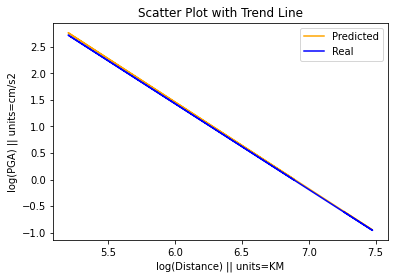

In [643]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = D1_test.flatten()
y = y_pred.flatten()
y1 = y1_test.flatten()
# Fit a polynomial curve to the data
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)
coefficients1 = np.polyfit(x, y1, 1)
trendline1 = np.poly1d(coefficients1)
# Plot the data as a scatter plot
#plt.scatter(x, y)
#plt.scatter(x,y1)

# Plot the trend line
plt.plot(x, trendline(x), color='orange',label='Predicted')
plt.plot(x, trendline1(x), color='blue',label='Real')

# Add labels and title
plt.xlabel('log(Distance) || units=KM')
plt.ylabel('log(PGA) || units=cm/s2')
plt.title('Scatter Plot with Trend Line')
plt.legend()
# Show the plot
plt.show()


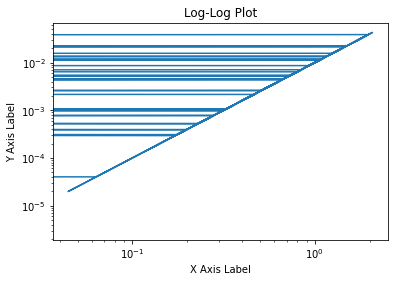

In [624]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = y_pred
y = 1e-2 * x ** 2

# Plot the data in a log-log scale
plt.loglog(x, y)

# Add labels and title
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Log-Log Plot')

# Show the plot
plt.show()


Text(0, 0.5, 'PGA(cm/s^2)')

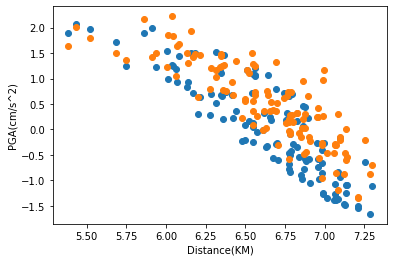

In [599]:
plt.scatter(D,y_pred)
plt.scatter(D,y)
#plt.ylim(0,2)
plt.xlabel('Distance(KM)')
plt.ylabel("PGA(cm/s^2)")

In [666]:
10**D1_test.max()

29960000.00000002

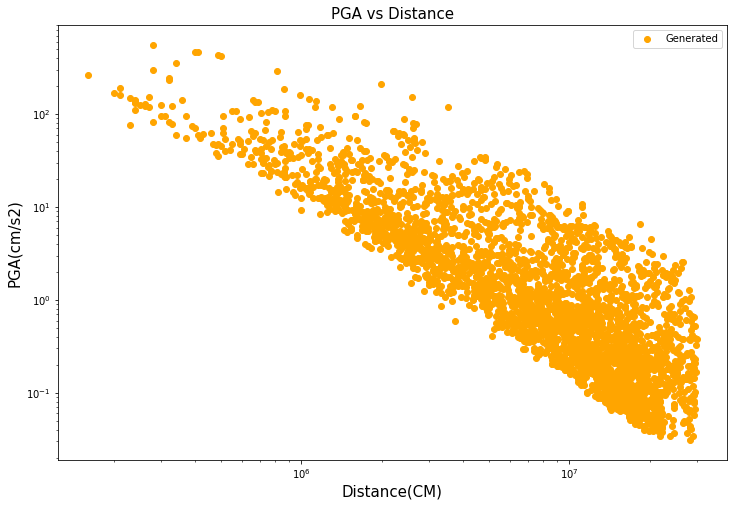

In [678]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
x = 10**(D1_test)
y = 10**y_pred
plt.figure(figsize=(12,8))
# Create a log-log plot
plt.loglog(x, y,'o',color='orange',label='Generated')

# Add axis labels and title

plt.xlabel('Distance(CM)',size=15)
plt.ylabel('PGA(cm/s2)',size=15)
plt.title('PGA vs Distance',size=15)

# Display the plot
plt.legend()
plt.show()


In [714]:
arr = np.random.rand(3, 6000)  # Example array
norm = np.linalg.norm(arr,ord=1)

In [411]:
x=[]
y=[]
get_batch(0)
x=np.array(x)
y=np.array(y)

Data Stopped at : 5650


In [721]:
arr.min()

0.00011601949795336797

In [717]:
k=arr**2

In [718]:
q=(k.sum(axis=1))**(1/2)

In [723]:
q

array([44.67561176, 44.72421383, 44.79819928])

### Fast Fourier Transform

In [384]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [385]:
generator=load_model('3D_generator.h5')

ValueError: No model config found in the file at <tensorflow.python.platform.gfile.GFile object at 0x000001B2851A77F0>.

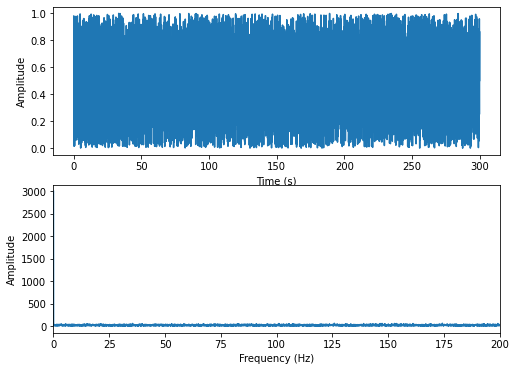

In [739]:
import numpy as np

# generate some sample data
signal=y[0]
N = len(signal)
t = np.linspace(0,N*0.05,N) 

# compute the Fourier transform
freqs = np.fft.fftfreq(N, t[1] - t[0])
fft = np.fft.fft(signal)
# plot the signal and its Fourier transform
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.plot(t, signal)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax2.plot(t,np.abs(fft))
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
plt.xlim(0,200)
plt.show()


In [742]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [743]:
generator = load_model('3D_generator.h5')

In [744]:
generator.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_14 (Reshape)        (None, 3, 4, 1)           0         
                                                                 
 dense_32 (Dense)            (None, 3, 4, 4)           8         
                                                                 
 dropout_15 (Dropout)        (None, 3, 4, 4)           0         
                                                                 
 flatten_6 (Flatten)         (None, 48)                0         
                                                                 
 reshape_15 (Reshape)        (None, 3, 16)             0         
                                                                 
 dense_33 (Dense)            (None, 3, 6000)           102000    
                                                                 
Total params: 102,008
Trainable params: 102,008
Non-t

In [989]:
#stopped=[0]
x=[]
y=[]

In [990]:
get_batch(0)

Data Stopped at : 3259


In [991]:
stopped=[0, 816, 1091, 1413, 1696, 2046,2678,2948]
stopped[-3]

2046

In [992]:
y_pred1=generator.predict(np.array(x))

4/4 [==============================] - 0s 3ms/step


In [993]:
y_pred=[]
for wave in y_pred1:
    k=[]
    for j in wave:
        k.append(j/np.max(np.abs(j)))
    k=np.array(k)
    y_pred.append(k)

In [994]:
y=np.array(y)
y=pool(y)
y=np.array(y).reshape(100,3,6000)

In [995]:
np.array(y).shape

(100, 3, 6000)

In [996]:
def save_samples(y_pred,y_test,x_test):
    for i in range(len(y_pred)):
        pd.DataFrame(y_pred[i]).to_csv('genwave_'+str(i+1)+'.csv')
        pd.DataFrame(y_test[i]).to_csv('realwave_'+str(i+1)+'.csv')
    pd.DataFrame(x_test.reshape(len(x_test)*3,4)).to_csv('Inputs.csv')

In [430]:
import numpy as np
from scipy import signal
# generate some sample data
i=10
yk=(abs(y[10][0]))
N = len(y[i][0])
t = np.linspace(0,N*0.05,N) 
order = 0.1
cutoff_freq = 30  # Hz

# Compute the digital Butterworth filter coefficients
b, a = signal.butter(order, cutoff_freq, btype='lowpass', fs=1000)

# Apply the filter to the signal
filtered_signal = signal.filtfilt(b, a, signal_to_filter)

N = len(yk)
signal= signal.convolve(yk, b, mode='same')
# compute the Fourier transform
freqs = np.fft.fftfreq(N, t[1] - t[0])
fft = np.fft.fft(signal)
# plot the signal and its Fourier transform
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.plot(t, signal)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax2.loglog(t,np.abs(fft))
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
#plt.xlim(0,200)
plt.show()

ValueError: Filter order must be a nonnegative integer

In [424]:
import numpy as np
from scipy.signal import butter, filtfilt

# Define the Butterworth filter
def butterworth_filter(data, lowcut, highcut, fs, order):
    nyquist_freq = 0.5 * fs
    low = lowcut / nyquist_freq
    high = highcut / nyquist_freq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Define the input signal
fs = 30  # sampling frequency
t = np.linspace(0, 1, fs)
f1 = 15  # frequency of the signal
f2 = 30
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# Apply the Butterworth filter to the signal
lowcut = 60  # lower cutoff frequency of the filter
highcut = 90  # upper cutoff frequency of the filter
order = 4  # filter order
filtered_signal = butterworth_filter(signal, lowcut, highcut, fs, order)


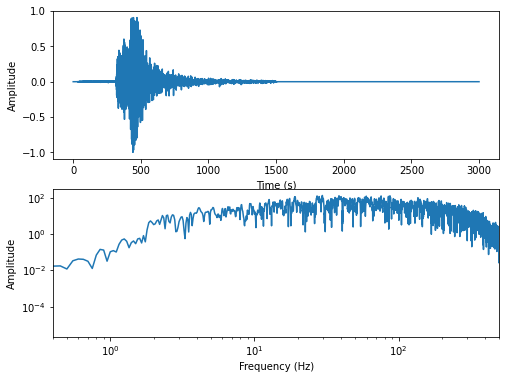

In [479]:
import numpy as np

# generate some sample data
signal=(y[7][0])
N = len(signal)
t = np.linspace(0,N*0.05,N) 

# compute the Fourier transform
freqs = np.fft.fftfreq(N, t[1] - t[0])
fft = np.fft.fft(signal)
# plot the signal and its Fourier transform
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.plot(t, signal)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax2.loglog(t,np.abs(fft))
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
plt.xlim(0.4,500)
plt.show()

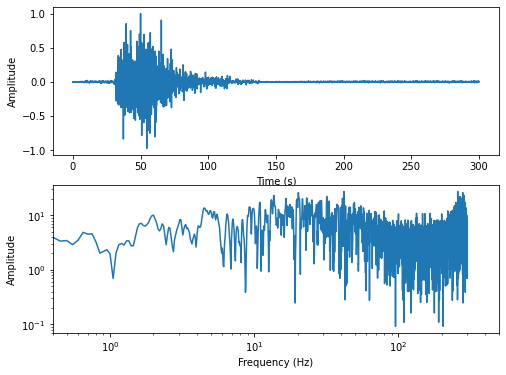

In [481]:
import numpy as np

# generate some sample data
signal=(y_pred[7][0])/np.max(np.abs(y_pred[0][2]))
N = len(signal)
t = np.linspace(0,N*0.05,N) 

# compute the Fourier transform
freqs = np.fft.fftfreq(N, t[1] - t[0])
fft = np.fft.fft(signal)
# plot the signal and its Fourier transform
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.plot(t, signal)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax2.loglog(t,np.abs(fft))
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
plt.xlim(0.4,500)
plt.show()

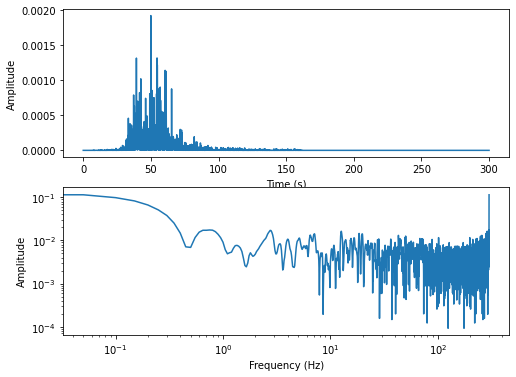

In [398]:
i=0
signal=((y_pred[i][2]**2)+(y_pred[i][1]**2)+(y_pred[i][0]**2))**1/2
N = len(signal)
t = np.linspace(0,N*0.05,N) 

# compute the Fourier transform
freqs = np.fft.fftfreq(N, t[1] - t[0])
fft = np.fft.fft(signal)
# plot the signal and its Fourier transform
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.plot(t, signal)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax2.loglog(t,np.abs(fft))
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
#plt.xlim(0,200)
plt.show()

In [877]:
signal/signal.max()

array([ 0.00162351,  0.00041882,  0.00151928, ..., -0.00056174,
       -0.00094954, -0.00100908], dtype=float32)

### Scaling the values in predictions

In [952]:
def save_samples(y_pred,y_test,x_test):
    for i in range(len(y_pred)):
        pd.DataFrame(y_pred[i]).to_csv('genwave_'+str(i+1)+'.csv')
        pd.DataFrame(y_test[i]).to_csv('realwave_'+str(i+1)+'.csv')
    pd.DataFrame(x_test.reshape(len(x_test)*3,4)).to_csv('Inputs0.csv')

In [954]:
save_samples(np.array(y_pred)[:20],np.array(y[:20]),np.array(x[:20])

AttributeError: 'list' object has no attribute 'reshape'

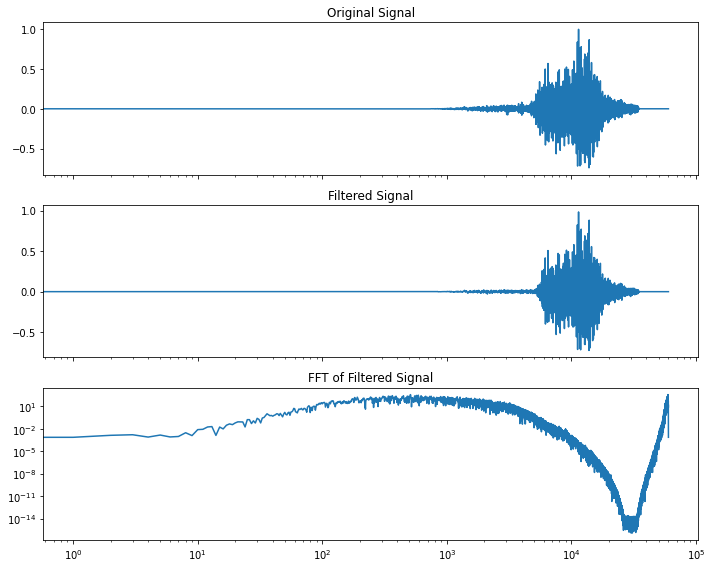

In [452]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Generate a random signal of length 6000
signal_length = 6000
x = y[0][0]

# Define filter parameters
order = 4
fs = 500
cutoff_freq = 30.0

# Normalize cutoff frequency
nyquist_freq = 0.5 * fs
normalized_cutoff_freq = cutoff_freq / nyquist_freq

# Define Butterworth filter
b, a = signal.butter(order, normalized_cutoff_freq, btype='lowpass')

# Apply filter to the signal
filtered_signal = signal.filtfilt(b, a, x)

# Compute FFT of the filtered signal
fft = np.fft.fft(filtered_signal)

# Plot original signal, filtered signal, and FFT
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10,8))
ax1.plot(y[0][0])
ax1.set_title('Original Signal')
ax2.plot(filtered_signal)
#ax2.set_xscale('linear')
ax2.set_title('Filtered Signal')
ax3.loglog(np.abs(fft))
#ax3.set_xscale('log')
ax3.set_title('FFT of Filtered Signal')
plt.tight_layout()
plt.show()
